In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import yfinance as yf
import seaborn as sns
from datetime import datetime

In [2]:
# Suppress all warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [3]:
# Set the working directory
os.chdir(r"D:\Benson\aUpWork\Douglas Backtester Algo\Backtester Algorithm\Data")

### CLEANING AND PREPARING HOURLY DATA FOR YMAX/YMAG PRICES AND DIVIDENDS

In [4]:
# Read the CSV file
YMAX_H1 = pd.read_csv("TradingView Data\YMAG 1H.csv")

# Convert the date column to datetime
YMAX_H1['time'] = pd.to_datetime(YMAX_H1['time'], utc=True)  # Ensure proper datetime format

# Print original date format sample
print("Original date format sample:", YMAX_H1['time'].iloc[0])

# Rename the 'time' column to 'Date'
YMAX_H1.rename(columns={'time': 'Date'}, inplace=True)

# Ensure uniform datetime format when merging with another dataframe
YMAX_H1['Date'] = YMAX_H1['Date'].dt.tz_convert(None)  #

# Display the first few rows to verify the conversion
print("\nFirst few rows after date conversion:")
YMAX_H1.head()


Original date format sample: 2024-01-31 14:30:00+00:00

First few rows after date conversion:


,Date,open,high,low,close
0,2024-01-31 14:30:00,19.65,19.65,19.59,19.59
1,2024-01-31 16:30:00,19.59,19.59,19.59,19.59
2,2024-01-31 19:30:00,19.55,19.55,19.55,19.55
3,2024-01-31 20:30:00,19.50,19.50,19.50,19.50
4,2024-02-01 14:30:00,19.65,19.65,19.65,19.65


In [5]:
# Read the CSV file
YMAG_H1 = pd.read_csv("TradingView Data\YMAG 1H.csv")

# Convert the date column to datetime
YMAG_H1['time'] = pd.to_datetime(YMAG_H1['time'], utc=True)  # Ensure proper datetime format

# Print original date format sample
print("Original date format sample:", YMAG_H1['time'].iloc[0])

# Rename the 'time' column to 'Date'
YMAG_H1.rename(columns={'time': 'Date'}, inplace=True)

# Ensure uniform datetime format when merging with another dataframe
YMAG_H1['Date'] = YMAG_H1['Date'].dt.tz_convert(None)  #

# Display the first few rows to verify the conversion
print("\nFirst few rows after date conversion:")
YMAG_H1.head()

Original date format sample: 2024-01-31 14:30:00+00:00

First few rows after date conversion:


,Date,open,high,low,close
0,2024-01-31 14:30:00,19.65,19.65,19.59,19.59
1,2024-01-31 16:30:00,19.59,19.59,19.59,19.59
2,2024-01-31 19:30:00,19.55,19.55,19.55,19.55
3,2024-01-31 20:30:00,19.50,19.50,19.50,19.50
4,2024-02-01 14:30:00,19.65,19.65,19.65,19.65


In [6]:
# Import the YMAG Dividends CSV file
YMAG_Dividends = pd.read_csv("YMAG_Dividends.csv")

# Convert the 'Date' column to datetime
YMAG_Dividends['Date'] = pd.to_datetime(YMAG_Dividends['Date'])

# Convert the datetime to dates with hours
YMAG_Dividends['Date'] = YMAG_Dividends['Date'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Convert the dates time and shift them ahead to start at 14:30:00 in the format 2024-01-18 14:30:00+00:00	
YMAG_Dividends['Date'] = pd.to_datetime(YMAG_Dividends['Date']) + pd.Timedelta(hours=14, minutes=30)

# Display the first few rows of the  DataFrame
YMAG_Dividends.head()

,Date,YMAG Dividends
0,2025-02-13 14:30:00,0.05
1,2025-02-06 14:30:00,0.19
2,2025-01-30 14:30:00,0.19
3,2025-01-23 14:30:00,0.10
4,2025-01-16 14:30:00,0.05


In [7]:
# Import the YMAX Dividends CSV file
YMAX_Dividends = pd.read_csv("YMAX_Dividends.csv")

# Convert the 'Date' column to datetime
YMAX_Dividends['Date'] = pd.to_datetime(YMAX_Dividends['Date'])

# Convert the datetime to dates with hours
YMAX_Dividends['Date'] = YMAX_Dividends['Date'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Convert the dates time and shift them ahead to start at 14:30:00
YMAX_Dividends['Date'] = pd.to_datetime(YMAX_Dividends['Date']) + pd.Timedelta(hours=14, minutes=30)

# Display the first few rows of the YMAX Dividends DataFrame
YMAX_Dividends.head()

,Date,YMAX Dividends
0,2025-02-13 14:30:00,0.15
1,2025-02-06 14:30:00,0.19
2,2025-01-30 14:30:00,0.15
3,2025-01-23 14:30:00,0.17
4,2025-01-16 14:30:00,0.11


In [8]:
# Merge the YMAG Dividends DataFrame with the YMAG DataFrame on the 'Date' column
YMAG = pd.merge(YMAG_H1, YMAG_Dividends, on='Date', how='outer')

# Drop open high low columns
YMAG = YMAG.drop(['open', 'high', 'low'], axis=1)

# Rename the 'close' column to 'YMAG'
YMAG.rename(columns={'close': 'YMAG'}, inplace=True)

# Display the first few rows of the merged DataFrame
YMAG.head()


,Date,YMAG,YMAG Dividends
0,2024-01-31 14:30:00,19.59,NaN
1,2024-01-31 16:30:00,19.59,NaN
2,2024-01-31 19:30:00,19.55,NaN
3,2024-01-31 20:30:00,19.50,NaN
4,2024-02-01 14:30:00,19.65,NaN


In [9]:
# Ensure the DataFrame is sorted by Date (ascending)
YMAG = YMAG.sort_values('Date').reset_index(drop=True)

# Loop over rows where YMAG is NaN but YMAG Dividends is not NaN
mask = YMAG['YMAG'].isna() & YMAG['YMAG Dividends'].notna()
na_rows = YMAG.index[mask]

for i in na_rows:
    # Find the next row j (j > i) where YMAG is not missing
    next_valid = YMAG.index[(YMAG.index > i) & (YMAG['YMAG'].notna())]
    if len(next_valid) > 0:
        j = next_valid[0]  # The first such row
        # Fill the next row's 'YMAG Dividends' with the current row's dividend
        YMAG.loc[j, 'YMAG Dividends'] = YMAG.loc[i, 'YMAG Dividends']


# Drop missing values in the column YMAG
YMAG = YMAG.dropna(subset=['YMAG'])

# Replace all missing values with zero
YMAG['YMAG Dividends'] = YMAG['YMAG Dividends'].fillna(0)

In [10]:
# Merge the YMAX Dividends DataFrame with the YMAX DataFrame on the 'Date' column
YMAX = pd.merge(YMAX_H1, YMAX_Dividends, on='Date', how='outer')

# Drop open high low columns
YMAX = YMAX.drop(['open', 'high', 'low'], axis=1)

# Rename the 'close' column to 'YMAX'
YMAX.rename(columns={'close': 'YMAX'}, inplace=True)

# Display the first few rows of the merged DataFrame
YMAX.head()

,Date,YMAX,YMAX Dividends
0,2024-01-31 14:30:00,19.59,NaN
1,2024-01-31 16:30:00,19.59,NaN
2,2024-01-31 19:30:00,19.55,NaN
3,2024-01-31 20:30:00,19.50,NaN
4,2024-02-01 14:30:00,19.65,NaN


In [11]:
# Ensure the DataFrame is sorted by Date (ascending)
YMAX = YMAX.sort_values('Date').reset_index(drop=True)

# Loop over rows where YMAX is NaN but YMAX Dividends is not NaN
mask = YMAX['YMAX'].isna() & YMAX['YMAX Dividends'].notna()
na_rows = YMAX.index[mask]

for i in na_rows:
    # Find the next row j (j > i) where YMAX is not missing
    next_valid = YMAX.index[(YMAX.index > i) & (YMAX['YMAX'].notna())]
    if len(next_valid) > 0:
        j = next_valid[0]  # The first such row
        # Fill the next row's 'YMAG Dividends' with the current row's dividend
        YMAX.loc[j, 'YMAX Dividends'] = YMAX.loc[i, 'YMAX Dividends']

# Drop missing values in the column YMAG
YMAX = YMAX.dropna(subset=['YMAX'])

# Replace all missing values with zero
YMAX['YMAX Dividends'] = YMAX['YMAX Dividends'].fillna(0)

In [12]:
# Export the YMAG DataFrame to a CSV file
YMAG.to_csv('TradingView Data\YMAG Hourly with Dividends.csv', index=False)

# Export the YMAX DataFrame to a CSV file
YMAX.to_csv('TradingView Data\YMAX Hourly with Dividends.csv', index=False)


### CLEANING AND PREPARING 4H DATA FOR YMAX/YMAG PRICES AND DIVIDENDS

In [13]:
# Read the CSV file
YMAX_4H = pd.read_csv("TradingView Data\YMAX 4H.csv")

# Convert the date column to datetime
YMAX_4H['time'] = pd.to_datetime(YMAX_4H['time'], utc=True)  # Ensure proper datetime format

# Print original date format sample
print("Original date format sample:", YMAX_4H['time'].iloc[0])

# Rename the 'time' column to 'Date'
YMAX_4H.rename(columns={'time': 'Date'}, inplace=True)

# Ensure uniform datetime format when merging with another dataframe
YMAX_4H['Date'] = YMAX_4H['Date'].dt.tz_convert(None)

# Display the first few rows to verify the conversion
print("\nFirst few rows after date conversion:")
YMAX_4H.head()


Original date format sample: 2024-01-18 14:30:00+00:00

First few rows after date conversion:


,Date,open,high,low,close
0,2024-01-18 14:30:00,20.99,20.99,19.85,19.85
1,2024-01-18 18:30:00,19.86,19.95,19.86,19.94
2,2024-01-19 14:30:00,19.98,20.00,19.90,19.98
3,2024-01-19 18:30:00,20.06,20.12,20.06,20.12
4,2024-01-22 14:30:00,20.25,20.28,20.15,20.15


In [14]:
# Merge the YMAX Dividends DataFrame with the YMAX_4H DataFrame on the 'Date' column
YMAX_4H = pd.merge(YMAX_4H, YMAX_Dividends, on='Date', how='outer')

# Drop open high low columns
YMAX_4H = YMAX_4H.drop(['open', 'high', 'low'], axis=1)

# Rename the 'close' column to 'YMAX'
YMAX_4H.rename(columns={'close': 'YMAX'}, inplace=True)

# Display the first few rows of the merged DataFrame
YMAX_4H.head()


,Date,YMAX,YMAX Dividends
0,2024-01-18 14:30:00,19.85,NaN
1,2024-01-18 18:30:00,19.94,NaN
2,2024-01-19 14:30:00,19.98,NaN
3,2024-01-19 18:30:00,20.12,NaN
4,2024-01-22 14:30:00,20.15,NaN


In [15]:
# Ensure the DataFrame is sorted by Date (ascending)
YMAX_4H = YMAX_4H.sort_values('Date').reset_index(drop=True)

# Loop over rows where YMAX is NaN but YMAX Dividends is not NaN
mask = YMAX_4H['YMAX'].isna() & YMAX_4H['YMAX Dividends'].notna()
na_rows = YMAX_4H.index[mask]

for i in na_rows:
    # Find the next row j (j > i) where YMAX is not missing
    next_valid = YMAX_4H.index[(YMAX_4H.index > i) & (YMAX_4H['YMAX'].notna())]
    if len(next_valid) > 0:
        j = next_valid[0]  # The first such row
        # Fill the next row's 'YMAG Dividends' with the current row's dividend
        YMAX_4H.loc[j, 'YMAX Dividends'] = YMAX_4H.loc[i, 'YMAX Dividends']

# Drop missing values in the column YMAG
YMAX_4H = YMAX_4H.dropna(subset=['YMAX'])

# Replace all missing values with zero
YMAX_4H['YMAX Dividends'] = YMAX_4H['YMAX Dividends'].fillna(0)

# Display the first few rows of the merged DataFrame
YMAX_4H.head()


,Date,YMAX,YMAX Dividends
0,2024-01-18 14:30:00,19.85,0.0
1,2024-01-18 18:30:00,19.94,0.0
2,2024-01-19 14:30:00,19.98,0.0
3,2024-01-19 18:30:00,20.12,0.0
4,2024-01-22 14:30:00,20.15,0.0


In [16]:
# Export the YMAX_4H DataFrame to a CSV file
YMAX_4H.to_csv('TradingView Data\YMAX 4H with Dividends.csv', index=False)

#### YMAG 4H PREPARATION

In [17]:
# Read the CSV file
YMAG_4H = pd.read_csv("TradingView Data\YMAG 4H.csv")

# Convert the date column to datetime
YMAG_4H['time'] = pd.to_datetime(YMAG_4H['time'], utc=True)  # Ensure proper datetime format

# Print original date format sample
print("Original date format sample:", YMAG_4H['time'].iloc[0])

# Rename the 'time' column to 'Date'
YMAG_4H.rename(columns={'time': 'Date'}, inplace=True)

# Ensure uniform datetime format when merging with another dataframe
YMAG_4H['Date'] = YMAG_4H['Date'].dt.tz_convert(None)

# Display the first few rows to verify the conversion
print("\nFirst few rows after date conversion:")
YMAG_4H.head()


Original date format sample: 2024-01-31 14:30:00+00:00

First few rows after date conversion:


,Date,open,high,low,close
0,2024-01-31 14:30:00,19.650,19.65,19.590,19.59
1,2024-01-31 18:30:00,19.550,19.55,19.500,19.50
2,2024-02-01 14:30:00,19.650,19.65,19.640,19.64
3,2024-02-01 18:30:00,19.705,19.71,19.705,19.71
4,2024-02-02 14:30:00,20.000,20.08,20.000,20.01


In [18]:
# Merge the YMAX Dividends DataFrame with the YMAX_4H DataFrame on the 'Date' column
YMAG_4H = pd.merge(YMAG_4H, YMAG_Dividends, on='Date', how='outer')

# Drop open high low columns
YMAG_4H = YMAG_4H.drop(['open', 'high', 'low'], axis=1)

# Rename the 'close' column to 'YMAG'
YMAG_4H.rename(columns={'close': 'YMAG'}, inplace=True)

# Display the first few rows of the merged DataFrame
YMAG_4H.head()


,Date,YMAG,YMAG Dividends
0,2024-01-31 14:30:00,19.59,NaN
1,2024-01-31 18:30:00,19.50,NaN
2,2024-02-01 14:30:00,19.64,NaN
3,2024-02-01 18:30:00,19.71,NaN
4,2024-02-02 14:30:00,20.01,NaN


In [19]:
# Ensure the DataFrame is sorted by Date (ascending)
YMAG_4H = YMAG_4H.sort_values('Date').reset_index(drop=True)

# Loop over rows where YMAX is NaN but YMAX Dividends is not NaN
mask = YMAG_4H['YMAG'].isna() & YMAG_4H['YMAG Dividends'].notna()
na_rows = YMAG_4H.index[mask]

for i in na_rows:
    # Find the next row j (j > i) where YMAX is not missing
    next_valid = YMAG_4H.index[(YMAG_4H.index > i) & (YMAG_4H['YMAG'].notna())]
    if len(next_valid) > 0:
        j = next_valid[0]  # The first such row
        # Fill the next row's 'YMAG Dividends' with the current row's dividend
        YMAG_4H.loc[j, 'YMAG Dividends'] = YMAG_4H.loc[i, 'YMAG Dividends']

# Drop missing values in the column YMAG
YMAG_4H = YMAG_4H.dropna(subset=['YMAG'])

# Replace all missing values with zero
YMAG_4H['YMAG Dividends'] = YMAG_4H['YMAG Dividends'].fillna(0)

# Display the first few rows of the merged DataFrame
YMAG_4H.head()


,Date,YMAG,YMAG Dividends
0,2024-01-31 14:30:00,19.59,0.0
1,2024-01-31 18:30:00,19.50,0.0
2,2024-02-01 14:30:00,19.64,0.0
3,2024-02-01 18:30:00,19.71,0.0
4,2024-02-02 14:30:00,20.01,0.0


In [20]:
# Export the YMAG_4H DataFrame to a CSV file
YMAG_4H.to_csv('TradingView Data\YMAG 4H with Dividends.csv', index=False)

### CLEANING AND PREPARING 30 MINUTES DATA FOR YMAX/YMAG PRICES AND DIVIDENDS

In [21]:
# Read the CSV file
YMAX_30M = pd.read_csv("TradingView Data\YMAX 30M.csv")

# Convert the date column to datetime
YMAX_30M['time'] = pd.to_datetime(YMAX_30M['time'], utc=True)  # Ensure proper datetime format

# Print original date format sample
print("Original date format sample:", YMAX_30M['time'].iloc[0])

# Rename the 'time' column to 'Date'
YMAX_30M.rename(columns={'time': 'Date'}, inplace=True)

# Ensure uniform datetime format when merging with another dataframe
YMAX_30M['Date'] = YMAX_30M['Date'].dt.tz_convert(None)

# Display the first few rows to verify the conversion
print("\nFirst few rows after date conversion:")
YMAX_30M.head()

Original date format sample: 2024-02-09 20:00:00+00:00

First few rows after date conversion:


,Date,open,high,low,close
0,2024-02-09 20:00:00,20.770,20.770,20.770,20.770
1,2024-02-12 14:30:00,20.900,20.930,20.900,20.920
2,2024-02-12 15:00:00,20.930,20.950,20.910,20.950
3,2024-02-13 16:00:00,20.685,20.685,20.685,20.685
4,2024-02-13 19:00:00,20.600,20.600,20.550,20.550


In [22]:
# Merge the YMAX Dividends DataFrame with the YMAX_30M DataFrame on the 'Date' column
YMAX_30M = pd.merge(YMAX_30M, YMAX_Dividends, on='Date', how='outer')

# Drop open high low columns
YMAX_30M = YMAX_30M.drop(['open', 'high', 'low'], axis=1)

# Rename the 'close' column to 'YMAX'
YMAX_30M.rename(columns={'close': 'YMAX'}, inplace=True)

# Display the first few rows of the merged DataFrame
YMAX_30M.head()

,Date,YMAX,YMAX Dividends
0,2024-02-09 20:00:00,20.770,NaN
1,2024-02-12 14:30:00,20.920,NaN
2,2024-02-12 15:00:00,20.950,NaN
3,2024-02-13 16:00:00,20.685,NaN
4,2024-02-13 19:00:00,20.550,NaN


In [23]:
# Ensure the DataFrame is sorted by Date (ascending)
YMAX_30M = YMAX_30M.sort_values('Date').reset_index(drop=True)

# Loop over rows where YMAX is NaN but YMAX Dividends is not NaN
mask = YMAX_30M['YMAX'].isna() & YMAX_30M['YMAX Dividends'].notna()
na_rows = YMAX_30M.index[mask]

for i in na_rows:
    # Find the next row j (j > i) where YMAX is not missing
    next_valid = YMAX_30M.index[(YMAX_30M.index > i) & (YMAX_30M['YMAX'].notna())]
    if len(next_valid) > 0:
        j = next_valid[0]  # The first such row
        # Fill the next row's 'YMAG Dividends' with the current row's dividend
        YMAX_30M.loc[j, 'YMAX Dividends'] = YMAX_30M.loc[i, 'YMAX Dividends']

# Drop missing values in the column YMAG
YMAX_30M = YMAX_30M.dropna(subset=['YMAX'])

# Replace all missing values with zero
YMAX_30M['YMAX Dividends'] = YMAX_30M['YMAX Dividends'].fillna(0)

# Display the first few rows of the merged DataFrame
YMAX_30M.head()


,Date,YMAX,YMAX Dividends
0,2024-02-09 20:00:00,20.770,0.0
1,2024-02-12 14:30:00,20.920,0.0
2,2024-02-12 15:00:00,20.950,0.0
3,2024-02-13 16:00:00,20.685,0.0
4,2024-02-13 19:00:00,20.550,0.0


In [24]:
# Export the YMAX_30M DataFrame to a CSV file
YMAX_30M.to_csv('TradingView Data\YMAX 30 Minutes with Dividends.csv', index=False)

##### YMAG 30 MINS PREPARATION

In [25]:
# Read the CSV file
YMAG_30M = pd.read_csv("TradingView Data\YMAG 30M.csv")

# Convert the date column to datetime
YMAG_30M['time'] = pd.to_datetime(YMAG_30M['time'], utc=True)  # Ensure proper datetime format

# Print original date format sample
print("Original date format sample:", YMAG_30M['time'].iloc[0])

# Rename the 'time' column to 'Date'
YMAG_30M.rename(columns={'time': 'Date'}, inplace=True)

# Ensure uniform datetime format when merging with another dataframe
YMAG_30M['Date'] = YMAG_30M['Date'].dt.tz_convert(None)

# Display the first few rows to verify the conversion
print("\nFirst few rows after date conversion:")
YMAG_30M.head()

Original date format sample: 2024-01-31 14:30:00+00:00

First few rows after date conversion:


,Date,open,high,low,close
0,2024-01-31 14:30:00,19.65,19.65,19.59,19.59
1,2024-01-31 16:30:00,19.59,19.59,19.59,19.59
2,2024-01-31 20:00:00,19.55,19.55,19.55,19.55
3,2024-01-31 20:30:00,19.50,19.50,19.50,19.50
4,2024-02-01 14:30:00,19.65,19.65,19.65,19.65


In [26]:
# Merge the YMAG Dividends DataFrame with the YMAG_30M DataFrame on the 'Date' column
YMAG_30M = pd.merge(YMAG_30M, YMAG_Dividends, on='Date', how='outer')

# Drop open high low columns
YMAG_30M = YMAG_30M.drop(['open', 'high', 'low'], axis=1)

# Rename the 'close' column to 'YMAG'
YMAG_30M.rename(columns={'close': 'YMAG'}, inplace=True)

# Display the first few rows of the merged DataFrame
YMAG_30M.head()

,Date,YMAG,YMAG Dividends
0,2024-01-31 14:30:00,19.59,NaN
1,2024-01-31 16:30:00,19.59,NaN
2,2024-01-31 20:00:00,19.55,NaN
3,2024-01-31 20:30:00,19.50,NaN
4,2024-02-01 14:30:00,19.65,NaN


In [27]:
# Ensure the DataFrame is sorted by Date (ascending)
YMAG_30M = YMAG_30M.sort_values('Date').reset_index(drop=True)

# Loop over rows where YMAX is NaN but YMAX Dividends is not NaN
mask = YMAG_30M['YMAG'].isna() & YMAG_30M['YMAG Dividends'].notna()
na_rows = YMAG_30M.index[mask]

for i in na_rows:
    # Find the next row j (j > i) where YMAX is not missing
    next_valid = YMAG_30M.index[(YMAG_30M.index > i) & (YMAG_30M['YMAG'].notna())]
    if len(next_valid) > 0:
        j = next_valid[0]  # The first such row
        # Fill the next row's 'YMAG Dividends' with the current row's dividend
        YMAG_30M.loc[j, 'YMAG Dividends'] = YMAG_30M.loc[i, 'YMAG Dividends']

# Drop missing values in the column YMAG
YMAG_30M = YMAG_30M.dropna(subset=['YMAG'])

# Replace all missing values with zero
YMAG_30M['YMAG Dividends'] = YMAG_30M['YMAG Dividends'].fillna(0)

# Display the first few rows of the merged DataFrame
YMAG_30M.head()


,Date,YMAG,YMAG Dividends
0,2024-01-31 14:30:00,19.59,0.0
1,2024-01-31 16:30:00,19.59,0.0
2,2024-01-31 20:00:00,19.55,0.0
3,2024-01-31 20:30:00,19.50,0.0
4,2024-02-01 14:30:00,19.65,0.0


In [28]:
# Export the YMAG_30M DataFrame to a CSV file
YMAG_30M.to_csv('TradingView Data\YMAG 30 Minutes with Dividends.csv', index=False)

### DOWNLOADING THE LOW FREQUENCY DATA, H1 FROM YAHOO FINANCE

In [29]:
# Define the time interval
interval = "1h"
start_date = "2024-01-01"
end_date = "2025-03-03"

# Download hourly data for each asset
VIX = yf.download('^VIX', start=start_date, end=end_date, interval=interval)
VVIX = yf.download('^VVIX', start=start_date, end=end_date, interval=interval)
QQQ = yf.download('QQQ', start=start_date, end=end_date, interval=interval)

# Keep only the 'Close' price and rename columns
VIX = VIX[['Close']].rename(columns={'Close': 'VIX'})
VVIX = VVIX[['Close']].rename(columns={'Close': 'VVIX'})
QQQ = QQQ[['Close']].rename(columns={'Close': 'QQQ'})

QQQ.to_csv('TradingView Data\QQQ 1H.csv', index=True)     # export qqq to csv
VIX.to_csv('TradingView Data\VIX 1H.csv', index=True)     # export vix to csv
VVIX.to_csv('TradingView Data\VVIX 1H.csv', index=True)   # export vvix to csv

# Importing the data to efficiently clean it
QQQ = pd.read_csv("TradingView Data\QQQ 1H.csv", skiprows=3, header=None, names=["Date", "QQQ"], parse_dates=[0])
VIX = pd.read_csv("TradingView Data\VIX 1H.csv", skiprows=3, header=None, names=["Date", "VIX"], parse_dates=[0])
VVIX = pd.read_csv("TradingView Data\VVIX 1H.csv", skiprows=3, header=None, names=["Date", "VVIX"], parse_dates=[0])

QQQ.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Date,QQQ
0,2024-01-02 14:30:00+00:00,402.640106
1,2024-01-02 15:30:00+00:00,403.559998
2,2024-01-02 16:30:00+00:00,403.519989
3,2024-01-02 17:30:00+00:00,402.859985
4,2024-01-02 18:30:00+00:00,402.079987


In [30]:
VVIX.head()

,Date,VVIX
0,2024-01-02 14:30:00+00:00,92.040001
1,2024-01-02 15:30:00+00:00,91.370003
2,2024-01-02 16:30:00+00:00,89.750000
3,2024-01-02 17:30:00+00:00,88.459999
4,2024-01-02 18:30:00+00:00,87.910004


In [31]:
VIX.head()

,Date,VIX
0,2024-01-02 08:00:00+00:00,13.22
1,2024-01-02 09:00:00+00:00,13.35
2,2024-01-02 10:00:00+00:00,13.40
3,2024-01-02 11:00:00+00:00,13.80
4,2024-01-02 12:00:00+00:00,14.22


In [32]:
# Merge the dataframes on the 'Date' column
merged_data = pd.merge(QQQ, VVIX, on='Date', how='outer')

# Adjust  VIX time by adding 30 minutes to all dates
VIX['Date'] = VIX['Date'] + pd.Timedelta(minutes=30)

# Merge the adjusted VIX data with the merged data
merged_data = pd.merge(merged_data, VIX, on='Date', how='outer')

# Convert the date column to datetime
merged_data['Date'] = pd.to_datetime(merged_data['Date'], utc=True)  # Ensure proper datetime format

# Ensure uniform datetime format when merging with another dataframe
merged_data['Date'] = merged_data['Date'].dt.tz_convert(None)

# Display the first few rows of the merged DataFrame
merged_data.head()

,Date,QQQ,VVIX,VIX
0,2024-01-02 08:30:00,NaN,NaN,13.22
1,2024-01-02 09:30:00,NaN,NaN,13.35
2,2024-01-02 10:30:00,NaN,NaN,13.40
3,2024-01-02 11:30:00,NaN,NaN,13.80
4,2024-01-02 12:30:00,NaN,NaN,14.22


#### MERGE H1 VIX, VVIX AND QQQ WITH YMAG AND YMAX

In [33]:
# Merge VIX, VVIX and QQQ with YMAG 1h on both right and left
YMAG_VIX_VVIX_QQQ_1H = pd.merge(YMAG, merged_data, on='Date', how='outer')

# Merge VIX, VVIX and QQQ with YMAX 1h
YMAX_VIX_VVIX_QQQ_1H = pd.merge (YMAX, merged_data, on='Date', how='outer')

# Display the first few rows of the merged DataFrame
YMAG_VIX_VVIX_QQQ_1H.head()

,Date,YMAG,YMAG Dividends,QQQ,VVIX,VIX
0,2024-01-02 08:30:00,NaN,NaN,NaN,NaN,13.22
1,2024-01-02 09:30:00,NaN,NaN,NaN,NaN,13.35
2,2024-01-02 10:30:00,NaN,NaN,NaN,NaN,13.40
3,2024-01-02 11:30:00,NaN,NaN,NaN,NaN,13.80
4,2024-01-02 12:30:00,NaN,NaN,NaN,NaN,14.22


In [34]:
# display the first few rows of the merged DataFrame
YMAX_VIX_VVIX_QQQ_1H.head()

,Date,YMAX,YMAX Dividends,QQQ,VVIX,VIX
0,2024-01-02 08:30:00,NaN,NaN,NaN,NaN,13.22
1,2024-01-02 09:30:00,NaN,NaN,NaN,NaN,13.35
2,2024-01-02 10:30:00,NaN,NaN,NaN,NaN,13.40
3,2024-01-02 11:30:00,NaN,NaN,NaN,NaN,13.80
4,2024-01-02 12:30:00,NaN,NaN,NaN,NaN,14.22


In [35]:
# Drop missing values
YMAG_VIX_VVIX_QQQ_1H = YMAG_VIX_VVIX_QQQ_1H.dropna()
YMAX_VIX_VVIX_QQQ_1H = YMAX_VIX_VVIX_QQQ_1H.dropna()

# Export the merged DataFrames to CSV files
YMAG_VIX_VVIX_QQQ_1H.to_csv('TradingView Data\YMAG_VIX_VVIX_QQQ_1H.csv', index=False)
YMAX_VIX_VVIX_QQQ_1H.to_csv('TradingView Data\YMAX_VIX_VVIX_QQQ_1H.csv', index=False)


#### IMPORTING AND CLEANING 30 MINS DATA DOWNLOADED FROM TRADINGVIEW FOR VIX, VVIX AND QQQ

In [36]:
# Import VIX 30 mins data
VIX_30M = pd.read_csv("TradingView Data\CBOE_VIX_30Mins.csv")

# Convert the date column to datetime
VIX_30M['time'] = pd.to_datetime(VIX_30M['time'], utc=True)  # Ensure proper datetime format

# Print original date format sample
print("Original date format sample:", VIX_30M['time'].iloc[0])

# Rename the 'time' column to 'Date'
VIX_30M.rename(columns={'time': 'Date'}, inplace=True)

# Ensure uniform datetime format when merging with another dataframe
VIX_30M['Date'] = VIX_30M['Date'].dt.tz_convert(None)

# Drop open high low columns
VIX_30M = VIX_30M.drop(['open', 'high', 'low'], axis=1)

# Rename the 'close' column to 'VIX'
VIX_30M.rename(columns={'close': 'VIX'}, inplace=True)

# Display the first few rows to verify the conversion
print("\nFirst few rows after date conversion:")
VIX_30M.head()


Original date format sample: 2023-02-22 15:30:00+00:00

First few rows after date conversion:


,Date,VIX
0,2023-02-22 15:30:00,22.76
1,2023-02-22 16:00:00,22.74
2,2023-02-22 16:30:00,22.56
3,2023-02-22 17:00:00,22.23
4,2023-02-22 17:30:00,22.23


In [37]:
# Import VIX 30 mins data
VVIX_30M = pd.read_csv("TradingView Data\CBOE_VVIX_30Mins.csv")

# Convert the date column to datetime
VVIX_30M['time'] = pd.to_datetime(VVIX_30M['time'], utc=True)  # Ensure proper datetime format

# Print original date format sample
print("Original date format sample:", VVIX_30M['time'].iloc[0])

# Rename the 'time' column to 'Date'
VVIX_30M.rename(columns={'time': 'Date'}, inplace=True)

# Ensure uniform datetime format when merging with another dataframe
VVIX_30M['Date'] = VVIX_30M['Date'].dt.tz_convert(None)

# Drop open high low columns
VVIX_30M = VVIX_30M.drop(['open', 'high', 'low'], axis=1)

# Rename the 'close' column to 'VVIX'
VVIX_30M.rename(columns={'close': 'VVIX'}, inplace=True)

# Display the first few rows to verify the conversion
print("\nFirst few rows after date conversion:")
VVIX_30M.head()


Original date format sample: 2023-07-31 19:30:00+00:00

First few rows after date conversion:


,Date,VVIX
0,2023-07-31 19:30:00,87.16
1,2023-07-31 20:00:00,86.63
2,2023-08-01 13:30:00,88.06
3,2023-08-01 14:00:00,88.81
4,2023-08-01 14:30:00,88.83


In [38]:
# Import VIX 30 mins data
QQQ_30M = pd.read_csv("TradingView Data\QQQ 30Mins.csv")

# Convert the date column to datetime
QQQ_30M['time'] = pd.to_datetime(QQQ_30M['time'], utc=True)  # Ensure proper datetime format

# Print original date format sample
print("Original date format sample:", QQQ_30M['time'].iloc[0])

# Rename the 'time' column to 'Date'
QQQ_30M.rename(columns={'time': 'Date'}, inplace=True)

# Ensure uniform datetime format when merging with another dataframe
QQQ_30M['Date'] = QQQ_30M['Date'].dt.tz_convert(None)

# Drop open high low columns
QQQ_30M = QQQ_30M.drop(['open', 'high', 'low'], axis=1)

# Rename the 'close' column to 'QQQ'
QQQ_30M.rename(columns={'close': 'QQQ'}, inplace=True)

# Display the first few rows to verify the conversion
print("\nFirst few rows after date conversion:")
QQQ_30M.head()


Original date format sample: 2023-03-10 14:30:00+00:00

First few rows after date conversion:


,Date,QQQ
0,2023-03-10 14:30:00,290.21
1,2023-03-10 15:00:00,290.48
2,2023-03-10 15:30:00,292.73
3,2023-03-10 16:00:00,293.50
4,2023-03-10 16:30:00,291.74


In [39]:
# Merge VIX_30M, VVIX_30M and QQQ_30M with YMAG 30M on both right and left
VIX_VVIX_QQQ_30M = pd.merge(VIX_30M, VVIX_30M, on='Date', how='outer')
VIX_VVIX_QQQ_30M = pd.merge(VIX_VVIX_QQQ_30M, QQQ_30M, on='Date', how='outer')

# Drop all entries before 2024-01-01
VIX_VVIX_QQQ_30M = VIX_VVIX_QQQ_30M[VIX_VVIX_QQQ_30M['Date'] >= '2024-01-01']

# Drop all entries after 2025-03-03
VIX_VVIX_QQQ_30M = VIX_VVIX_QQQ_30M[VIX_VVIX_QQQ_30M['Date'] <= '2025-03-03']

# Display the first few rows of the merged DataFrame
VIX_VVIX_QQQ_30M.head()


,Date,VIX,VVIX,QQQ
3010,2024-01-02 14:30:00,13.92,92.15,403.57
3011,2024-01-02 15:00:00,13.93,92.04,402.64
3012,2024-01-02 15:30:00,13.88,92.22,402.36
3013,2024-01-02 16:00:00,13.64,91.37,403.55
3014,2024-01-02 16:30:00,13.40,90.34,403.96


In [40]:
# Merge YMAX data with the indicators
YMAX_VIX_VVIX_QQQ_30M = pd.merge(YMAX_30M, VIX_VVIX_QQQ_30M, on='Date', how='outer')

# Export the merged data to CSV
YMAX_VIX_VVIX_QQQ_30M.to_csv('TradingView Data\YMAX_VIX_VVIX_QQQ_30M.csv', index=False)

# Drop rows where YMAX is NaN then all others
YMAX_VIX_VVIX_QQQ_30M = YMAX_VIX_VVIX_QQQ_30M.dropna(subset=['YMAX'])
YMAX_VIX_VVIX_QQQ_30M = YMAX_VIX_VVIX_QQQ_30M.dropna()

# Display the head
YMAX_VIX_VVIX_QQQ_30M

,Date,YMAX,YMAX Dividends,VIX,VVIX,QQQ
389,2024-02-09 20:00:00,20.770,0.0,12.93,82.67,437.16
392,2024-02-12 14:30:00,20.920,0.0,13.54,83.93,437.18
393,2024-02-12 15:00:00,20.950,0.0,13.56,84.19,437.00
409,2024-02-13 16:00:00,20.685,0.0,14.66,85.79,430.34
415,2024-02-13 19:00:00,20.550,0.0,16.00,94.00,426.97
...,...,...,...,...,...,...
4056,2025-02-28 18:30:00,14.740,0.0,22.36,116.26,499.00
4057,2025-02-28 19:00:00,14.750,0.0,21.59,116.30,500.49
4058,2025-02-28 19:30:00,14.825,0.0,20.87,114.24,503.07
4059,2025-02-28 20:00:00,14.825,0.0,20.61,110.59,504.40


In [41]:
# Merge YMAG data with the indicators
YMAG_VIX_VVIX_QQQ_30M = pd.merge(YMAG_30M, VIX_VVIX_QQQ_30M, on='Date', how='outer')

# Drop rows where YMAG is NaN then all others
YMAG_VIX_VVIX_QQQ_30M = YMAG_VIX_VVIX_QQQ_30M.dropna(subset=['YMAG'])
YMAG_VIX_VVIX_QQQ_30M = YMAG_VIX_VVIX_QQQ_30M.dropna()

# Export the merged data to CSV
YMAG_VIX_VVIX_QQQ_30M.to_csv('TradingView Data\YMAG_VIX_VVIX_QQQ_30M.csv', index=False)

# Display the head
YMAG_VIX_VVIX_QQQ_30M

,Date,YMAG,YMAG Dividends,VIX,VVIX,QQQ
280,2024-01-31 14:30:00,19.590,0.0,13.79,85.37,420.16
284,2024-01-31 16:30:00,19.590,0.0,14.37,89.03,419.44
291,2024-01-31 20:00:00,19.550,0.0,14.24,86.74,418.41
292,2024-01-31 20:30:00,19.500,0.0,14.57,87.68,416.86
294,2024-02-01 14:30:00,19.650,0.0,14.25,85.96,418.80
...,...,...,...,...,...,...
4055,2025-02-28 18:30:00,16.440,0.0,22.36,116.26,499.00
4056,2025-02-28 19:00:00,16.440,0.0,21.59,116.30,500.49
4057,2025-02-28 19:30:00,16.570,0.0,20.87,114.24,503.07
4058,2025-02-28 20:00:00,16.580,0.0,20.61,110.59,504.40


#### IMPORTING AND CLEANING 4 HOURS DATA DOWNLOADED FROM TRADINGVIEW FOR VIX, VVIX AND QQQ

In [42]:
# Import VIX 30 mins data
VIX_4H = pd.read_csv("TradingView Data\CBOE_VIX_4H.csv")

# Convert the date column to datetime
VIX_4H['time'] = pd.to_datetime(VIX_4H['time'], utc=True)  # Ensure proper datetime format

# Print original date format sample
print("Original date format sample:", VIX_4H['time'].iloc[0])

# Rename the 'time' column to 'Date'
VIX_4H.rename(columns={'time': 'Date'}, inplace=True)

# Ensure uniform datetime format when merging with another dataframe
VIX_4H['Date'] = VIX_4H['Date'].dt.tz_convert(None)

# Drop open high low columns
VIX_4H = VIX_4H.drop(['open', 'high', 'low'], axis=1)

# Rename the 'close' column to 'VIX'
VIX_4H.rename(columns={'close': 'VIX'}, inplace=True)

# Display the first few rows to verify the conversion
print("\nFirst few rows after date conversion:")
VIX_4H.head()


Original date format sample: 2020-08-06 13:30:00+00:00

First few rows after date conversion:


,Date,VIX
0,2020-08-06 13:30:00,22.87
1,2020-08-06 17:30:00,22.65
2,2020-08-07 13:30:00,22.48
3,2020-08-07 17:30:00,22.21
4,2020-08-10 13:30:00,22.22


In [43]:
# Import VIX 30 mins data
VVIX_4H = pd.read_csv("TradingView Data\CBOE_VVIX_4H.csv")

# Convert the date column to datetime
VVIX_4H['time'] = pd.to_datetime(VVIX_4H['time'], utc=True)  # Ensure proper datetime format

# Print original date format sample
print("Original date format sample:", VVIX_4H['time'].iloc[0])

# Rename the 'time' column to 'Date'
VVIX_4H.rename(columns={'time': 'Date'}, inplace=True)

# Ensure uniform datetime format when merging with another dataframe
VVIX_4H['Date'] = VVIX_4H['Date'].dt.tz_convert(None)

# Drop open high low columns
VVIX_4H = VVIX_4H.drop(['open', 'high', 'low'], axis=1)

# Rename the 'close' column to 'VVIX'
VVIX_4H.rename(columns={'close': 'VVIX'}, inplace=True)

# Display the first few rows to verify the conversion
print("\nFirst few rows after date conversion:")
VVIX_4H.head()


Original date format sample: 2020-08-05 17:30:00+00:00

First few rows after date conversion:


,Date,VVIX
0,2020-08-05 17:30:00,105.67
1,2020-08-06 13:30:00,105.96
2,2020-08-06 17:30:00,105.84
3,2020-08-07 13:30:00,106.65
4,2020-08-07 17:30:00,108.18


In [44]:
# Import VIX 30 mins data
QQQ_4H = pd.read_csv("TradingView Data\QQQ 4H.csv")

# Convert the date column to datetime
QQQ_4H['time'] = pd.to_datetime(QQQ_4H['time'], utc=True)  # Ensure proper datetime format

# Print original date format sample
print("Original date format sample:", QQQ_4H['time'].iloc[0])

# Rename the 'time' column to 'Date'
QQQ_4H.rename(columns={'time': 'Date'}, inplace=True)

# Ensure uniform datetime format when merging with another dataframe
QQQ_4H['Date'] = QQQ_4H['Date'].dt.tz_convert(None)

# Drop open high low columns
QQQ_4H = QQQ_4H.drop(['open', 'high', 'low'], axis=1)

# Rename the 'close' column to 'QQQ'
QQQ_4H.rename(columns={'close': 'QQQ'}, inplace=True)

# Display the first few rows to verify the conversion
print("\nFirst few rows after date conversion:")
QQQ_4H.head()


Original date format sample: 2019-02-07 14:30:00+00:00

First few rows after date conversion:


,Date,QQQ
0,2019-02-07 14:30:00,167.75
1,2019-02-07 18:30:00,168.24
2,2019-02-08 14:30:00,167.53
3,2019-02-08 18:30:00,168.51
4,2019-02-11 14:30:00,168.39


In [45]:
# Merge VIX_30M, VVIX_30M and QQQ_30M with YMAG 30M on both right and left
VIX_VVIX_QQQ_4H = pd.merge(VIX_4H, VVIX_4H, on='Date', how='outer')
VIX_VVIX_QQQ_4H = pd.merge(VIX_VVIX_QQQ_4H, QQQ_4H, on='Date', how='outer')

# Drop all entries before 2024-01-01
VIX_VVIX_QQQ_4H = VIX_VVIX_QQQ_4H[VIX_VVIX_QQQ_4H['Date'] >= '2024-01-01']

# Drop all entries after 2025-03-03
VIX_VVIX_QQQ_4H = VIX_VVIX_QQQ_4H[VIX_VVIX_QQQ_4H['Date'] <= '2025-03-03']

# Display the first few rows of the merged DataFrame
VIX_VVIX_QQQ_4H.head()

,Date,VIX,VVIX,QQQ
2465,2024-01-02 14:30:00,13.22,88.46,402.86
2466,2024-01-02 18:30:00,13.20,88.03,402.56
2467,2024-01-03 14:30:00,13.59,88.57,399.51
2468,2024-01-03 18:30:00,14.03,89.69,398.34
2469,2024-01-04 14:30:00,13.90,87.48,398.00


In [46]:
# Merge YMAX data with the indicators
YMAX_VIX_VVIX_QQQ_4H = pd.merge(YMAX_4H, VIX_VVIX_QQQ_4H, on='Date', how='outer')

# Drop rows where YMAX is NaN then all others
YMAX_VIX_VVIX_QQQ_4H = YMAX_VIX_VVIX_QQQ_4H.dropna(subset=['YMAX'])
YMAX_VIX_VVIX_QQQ_4H = YMAX_VIX_VVIX_QQQ_4H.dropna()

# Export the merged dataframe to CSV
YMAX_VIX_VVIX_QQQ_4H.to_csv('TradingView Data\YMAX_VIX_VVIX_QQQ_4H.csv', index=False)

# Display the head
YMAX_VIX_VVIX_QQQ_4H

,Date,YMAX,YMAX Dividends,VIX,VVIX,QQQ
22,2024-01-18 14:30:00,19.850,0.0,14.81,89.96,409.48
23,2024-01-18 18:30:00,19.940,0.0,14.14,86.34,413.17
24,2024-01-19 14:30:00,19.980,0.0,13.62,81.88,419.03
25,2024-01-19 18:30:00,20.120,0.0,13.30,81.96,421.23
26,2024-01-22 14:30:00,20.150,0.0,13.56,80.57,421.26
...,...,...,...,...,...,...
576,2025-02-26 18:30:00,15.305,0.0,19.07,106.06,514.50
577,2025-02-27 14:30:00,15.140,0.0,18.45,105.22,512.16
578,2025-02-27 18:30:00,14.790,0.0,21.16,114.79,500.32
579,2025-02-28 14:30:00,14.680,0.0,21.71,114.69,500.14


In [47]:
# Merge YMAG data with the indicators
YMAG_VIX_VVIX_QQQ_4H = pd.merge(YMAG_4H, VIX_VVIX_QQQ_4H, on='Date', how='outer')

# Drop rows where YMAG is NaN then all others
YMAG_VIX_VVIX_QQQ_4H = YMAG_VIX_VVIX_QQQ_4H.dropna(subset=['YMAG'])
YMAG_VIX_VVIX_QQQ_4H = YMAG_VIX_VVIX_QQQ_4H.dropna()

# Export the merged dataframe to CSV
YMAG_VIX_VVIX_QQQ_4H.to_csv('TradingView Data\YMAG_VIX_VVIX_QQQ_4H.csv', index=False)

# Display the head
YMAG_VIX_VVIX_QQQ_4H

,Date,YMAG,YMAG Dividends,VIX,VVIX,QQQ
40,2024-01-31 14:30:00,19.590,0.0,13.97,85.63,420.29
41,2024-01-31 18:30:00,19.500,0.0,14.36,87.56,416.86
42,2024-02-01 14:30:00,19.640,0.0,13.99,86.01,420.44
43,2024-02-01 18:30:00,19.710,0.0,13.90,84.81,422.07
44,2024-02-02 14:30:00,20.010,0.0,14.00,84.16,428.63
...,...,...,...,...,...,...
576,2025-02-26 18:30:00,17.070,0.0,19.07,106.06,514.50
577,2025-02-27 14:30:00,16.830,0.0,18.45,105.22,512.16
578,2025-02-27 18:30:00,16.450,0.0,21.16,114.79,500.32
579,2025-02-28 14:30:00,16.410,0.0,21.71,114.69,500.14


## DAILY DATA

In [59]:
# Load the data
YMAG_VIX_VVIX_QQQ_Daily = pd.read_csv("All Assets and Dividends.csv")

# Convert the Date column to datetime format
YMAG_VIX_VVIX_QQQ_Daily["Date"] = pd.to_datetime(YMAG_VIX_VVIX_QQQ_Daily["Date"])

# reorder the position of columns
YMAG_VIX_VVIX_QQQ_Daily = YMAG_VIX_VVIX_QQQ_Daily[['Date', 'YMAX', 'YMAX Dividends', 'YMAG', 'YMAG Dividends', 'VIX', 'VVIX', 'QQQ']]

# Export to CSV
YMAG_VIX_VVIX_QQQ_Daily.to_csv('TradingView Data\YMAG_YMAX_VIX_VVIX_QQQ_Daily.csv', index=False)

#view the data
YMAG_VIX_VVIX_QQQ_Daily.head()

,Date,YMAX,YMAX Dividends,YMAG,YMAG Dividends,VIX,VVIX,QQQ
0,2024-01-31,20.20,0.0,19.49,0.0,14.35,87.559998,414.506744
1,2024-02-01,20.39,0.0,19.75,0.0,13.88,84.830002,419.387726
2,2024-02-02,20.70,0.0,20.30,0.0,13.85,83.309998,426.475586
3,2024-02-05,20.44,0.0,20.19,0.0,13.67,79.580002,425.918945
4,2024-02-06,20.61,0.0,20.20,0.0,13.06,76.970001,425.063995


In [ ]:
# Load the data
YMAX_VIX_VVIX_QQQ_Daily = pd.read_csv("All Assets and Dividends.csv")

# Convert the Date column to datetime format
YMAX_VIX_VVIX_QQQ_Daily["Date"] = pd.to_datetime(YMAX_VIX_VVIX_QQQ_Daily["Date"])

# reorder the position of columns
YMAX_VIX_VVIX_QQQ_Daily = YMAG_VIX_VVIX_QQQ_Daily[['Date', 'YMAX', 'YMAX Dividends', 'VIX', 'VVIX', 'QQQ']]

# Export to CSV
YMAX_VIX_VVIX_QQQ_Daily.to_csv('TradingView Data\YMAX_VIX_VVIX_QQQ_Daily.csv', index=False)


#view the data
YMAX_VIX_VVIX_QQQ_Daily.head()

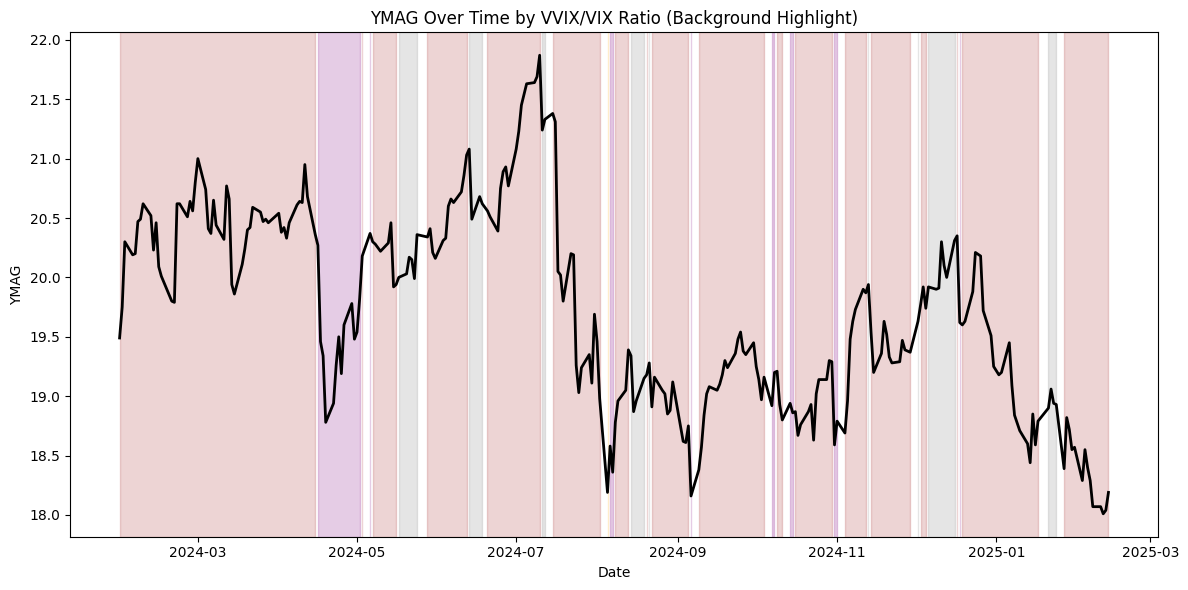

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Prepare the DataFrame ---
df = YMAG_VIX_VVIX_QQQ_Daily.copy()  # Use your actual DataFrame name
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

df['ratio'] = df['VVIX'] / df['VIX']
df['ratio_int'] = df['ratio'].round(0).astype(int)
df['change_id'] = (df['ratio_int'] != df['ratio_int'].shift(1)).cumsum()

color_map = {
    1: 'green',
    2: 'red',
    3: 'blue',
    4: 'orange',
    5: 'purple',
    6: 'brown',
    7: 'gray',
    8: 'pink',
    9: 'olive',
    10: 'cyan'
}

# --- 2. Plot a single line, then color each ratio region ---
fig, ax = plt.subplots(figsize=(12, 6))

# First plot the YMAG line in a neutral color (e.g., black)
ax.plot(df['Date'], df['YMAG'], color='black', linewidth=2)

# Now add rectangular spans for each ratio region
for _, grp in df.groupby('change_id'):
    ratio_val = grp['ratio_int'].iloc[0]
    color = color_map.get(ratio_val, 'gray')
    
    # The region spans from the first Date to the last Date in this group
    start_date = grp['Date'].iloc[0]
    end_date = grp['Date'].iloc[-1]
    
    # Shade the background with axvspan
    ax.axvspan(start_date, end_date, color=color, alpha=0.2)

ax.set_title('YMAG Over Time by VVIX/VIX Ratio (Background Highlight)')
ax.set_xlabel('Date')
ax.set_ylabel('YMAG')
plt.tight_layout()
plt.show()


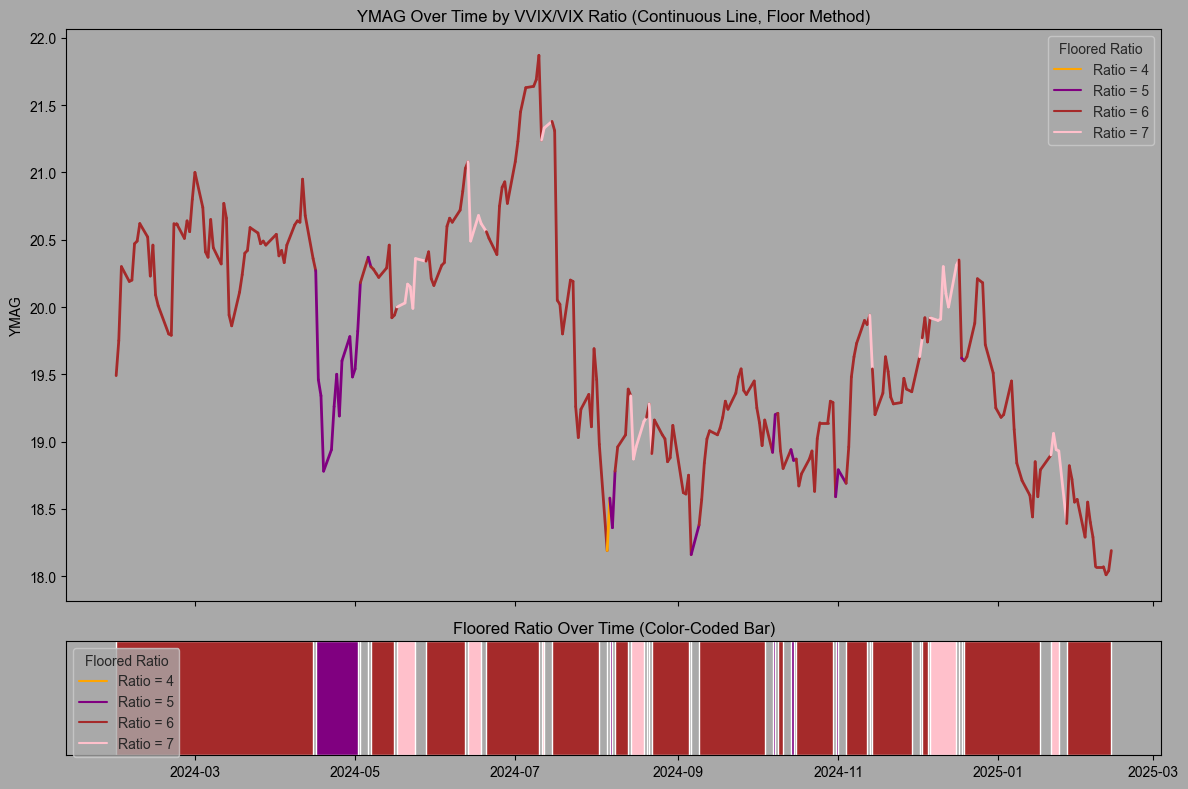

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Prepare Data ---
df = YMAG_VIX_VVIX_QQQ_Daily.copy()  # Use your actual DataFrame name
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

# Compute the ratio and floor it
df['ratio'] = df['VVIX'] / df['VIX']
df['ratio_int'] = np.round(df['ratio'], 0).astype(int)

# Identify segments (change_id) where the floored ratio changes
df['change_id'] = (df['ratio_int'] != df['ratio_int'].shift(1)).cumsum()

# --- 2. Define a color map for each ratio ---
color_map = {
    1: 'green',
    2: 'red',
    3: 'blue',
    4: 'orange',
    5: 'purple',
    6: 'brown',
    7: 'pink',
    8: 'gray',
    9: 'olive',
    10: 'cyan'
}

# Get all unique ratios (sorted) for legend and coloring
unique_ratios = sorted(df['ratio_int'].unique())

# --- 3. Create a 2-subplot figure: top = line plot, bottom = colored band ---
fig, (ax_line, ax_bar) = plt.subplots(
    2, 1, sharex=True, figsize=(12, 8),
    gridspec_kw={'height_ratios': [2, 0.4]}
)

# Set dark gray background for figure and axes
fig.patch.set_facecolor('darkgray')
ax_line.set_facecolor('darkgray')
ax_bar.set_facecolor('darkgray')

# Optional: Seaborn style with a dark grid
sns.set_style("darkgrid", {'axes.facecolor': 'darkgray'})

# ==================================================================
#   TOP SUBPLOT: CONTINUOUS LINE COLORED BY FLOORED RATIO
# ==================================================================
# 3a. Add "dummy" lines so each ratio appears in the legend exactly once
for ratio_val in unique_ratios:
    ax_line.plot([], [], color=color_map.get(ratio_val, 'black'), 
                 label=f'Ratio = {ratio_val}')

# 3b. Plot pairwise segments for a continuous line
for i in range(len(df) - 1):
    x1 = df.iloc[i]['Date']
    y1 = df.iloc[i]['YMAG']
    ratio1 = df.iloc[i]['ratio_int']
    x2 = df.iloc[i+1]['Date']
    y2 = df.iloc[i+1]['YMAG']
    
    color = color_map.get(ratio1, 'black')
    ax_line.plot([x1, x2], [y1, y2], color=color, linewidth=2)

ax_line.set_title('YMAG Over Time by VVIX/VIX Ratio (Continuous Line, Floor Method)')
ax_line.set_ylabel('YMAG')
ax_line.legend(title='Floored Ratio')

# ==================================================================
#   BOTTOM SUBPLOT: COLORED BANDS FOR EACH RATIO SEGMENT
# ==================================================================
# 4a. Add dummy lines for the bottom legend as well (optional)
for ratio_val in unique_ratios:
    ax_bar.plot([], [], color=color_map.get(ratio_val, 'black'), 
                label=f'Ratio = {ratio_val}')

# 4b. For each segment where ratio_int is constant, shade axvspan
for _, grp in df.groupby('change_id'):
    ratio_val = grp['ratio_int'].iloc[0]
    color = color_map.get(ratio_val, 'black')
    start_date = grp['Date'].iloc[0]
    end_date = grp['Date'].iloc[-1]
    ax_bar.axvspan(start_date, end_date, facecolor=color, alpha=1.0)

ax_bar.set_ylim(0, 1)         # Just a small band
ax_bar.set_yticks([])         # Hide y-axis ticks
ax_bar.set_ylabel('')         # Hide y-axis label
ax_bar.set_title('Floored Ratio Over Time (Color-Coded Bar)')
ax_bar.legend(title='Floored Ratio', loc='upper left')

# Layout
plt.tight_layout()
plt.show()


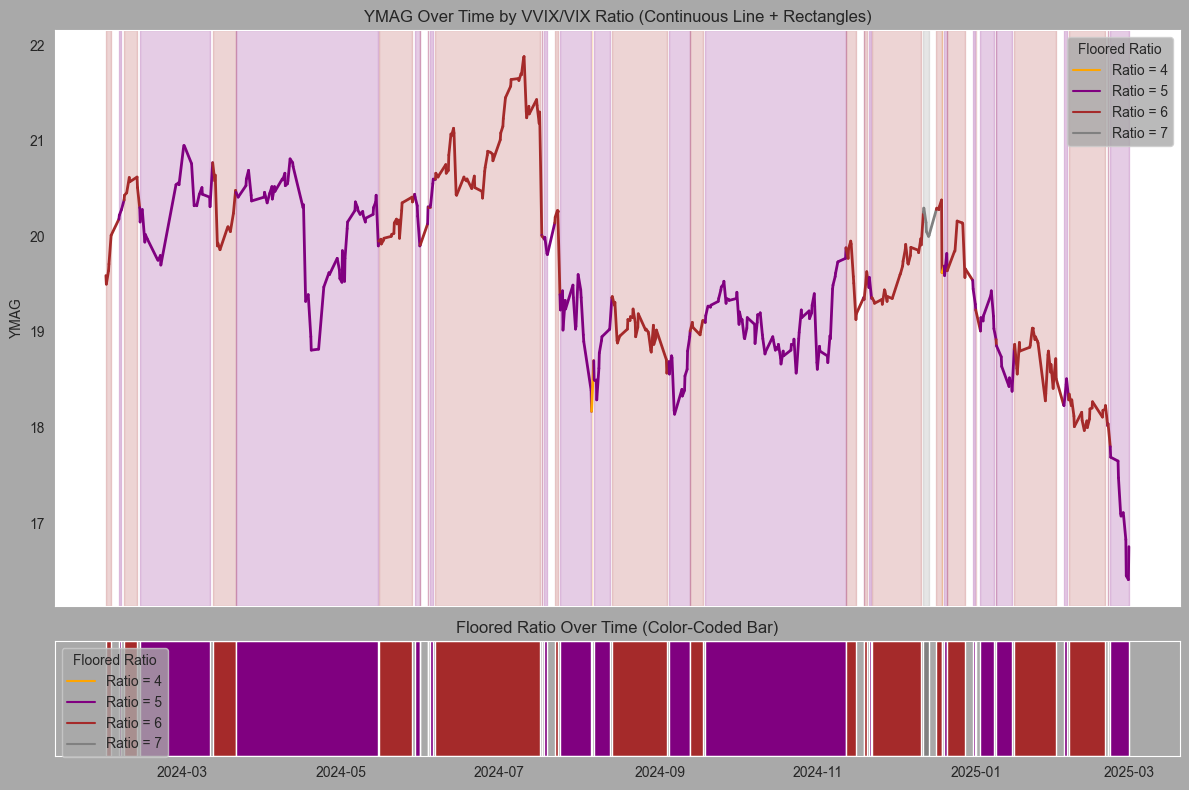

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Prepare Data ---
df = YMAG_VIX_VVIX_QQQ_4H.copy()  # Use your actual DataFrame name
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

# Compute the ratio and floor it
df['ratio'] = df['VVIX'] / df['VIX']
df['ratio_int'] = np.floor(df['ratio']).astype(int)

# Identify segments (change_id) where the floored ratio changes
df['change_id'] = (df['ratio_int'] != df['ratio_int'].shift(1)).cumsum()

# --- 2. Define a color map for each ratio ---
color_map = {
    1: 'green',
    2: 'red',
    3: 'blue',
    4: 'orange',
    5: 'purple',
    6: 'brown',
    7: 'gray',
    8: 'pink',
    9: 'olive',
    10: 'cyan'
}

# Get all unique ratios (sorted) for legend
unique_ratios = sorted(df['ratio_int'].unique())

# --- 3. Create a 2-subplot figure ---
fig, (ax_line, ax_bar) = plt.subplots(
    2, 1, sharex=True, figsize=(12, 8),
    gridspec_kw={'height_ratios': [2, 0.4]}
)

# Set dark gray background for figure and axes
fig.patch.set_facecolor('darkgray')
ax_line.set_facecolor('white')
ax_bar.set_facecolor('darkgray')

# Optional: Seaborn style with a dark grid
sns.set_style("darkgrid", {'axes.facecolor': 'darkgray'})

# ==================================================================
#   TOP SUBPLOT: CONTINUOUS LINE + RECTANGLES
# ==================================================================
# A) Add "dummy" lines so each ratio appears once in the legend
for ratio_val in unique_ratios:
    ax_line.plot([], [], color=color_map.get(ratio_val, 'black'),
                 label=f'Ratio = {ratio_val}')

# B) Plot pairwise segments for a continuous line
for i in range(len(df) - 1):
    x1 = df.iloc[i]['Date']
    y1 = df.iloc[i]['YMAG']
    ratio1 = df.iloc[i]['ratio_int']
    x2 = df.iloc[i+1]['Date']
    y2 = df.iloc[i+1]['YMAG']
    
    color = color_map.get(ratio1, 'black')
    ax_line.plot([x1, x2], [y1, y2], color=color, linewidth=2)

# C) Add semi-transparent rectangles for each ratio segment
for _, grp in df.groupby('change_id'):
    ratio_val = grp['ratio_int'].iloc[0]
    color = color_map.get(ratio_val, 'black')
    start_date = grp['Date'].iloc[0]
    end_date = grp['Date'].iloc[-1]
    ax_line.axvspan(start_date, end_date, color=color, alpha=0.2)

ax_line.set_title('YMAG Over Time by VVIX/VIX Ratio (Continuous Line + Rectangles)')
ax_line.set_ylabel('YMAG')
ax_line.legend(title='Floored Ratio')

# ==================================================================
#   BOTTOM SUBPLOT: SINGLE BAR OF COLOR FOR EACH SEGMENT
# ==================================================================
# A) Add dummy lines for legend
for ratio_val in unique_ratios:
    ax_bar.plot([], [], color=color_map.get(ratio_val, 'black'),
                label=f'Ratio = {ratio_val}')

# B) For each segment, fill the bottom subplot with a solid rectangle
for _, grp in df.groupby('change_id'):
    ratio_val = grp['ratio_int'].iloc[0]
    color = color_map.get(ratio_val, 'black')
    start_date = grp['Date'].iloc[0]
    end_date = grp['Date'].iloc[-1]
    ax_bar.axvspan(start_date, end_date, facecolor=color, alpha=1.0)

ax_bar.set_ylim(0, 1)
ax_bar.set_yticks([])
ax_bar.set_ylabel('')
ax_bar.set_title('Floored Ratio Over Time (Color-Coded Bar)')
ax_bar.legend(title='Floored Ratio', loc='upper left')

plt.tight_layout()
plt.show()


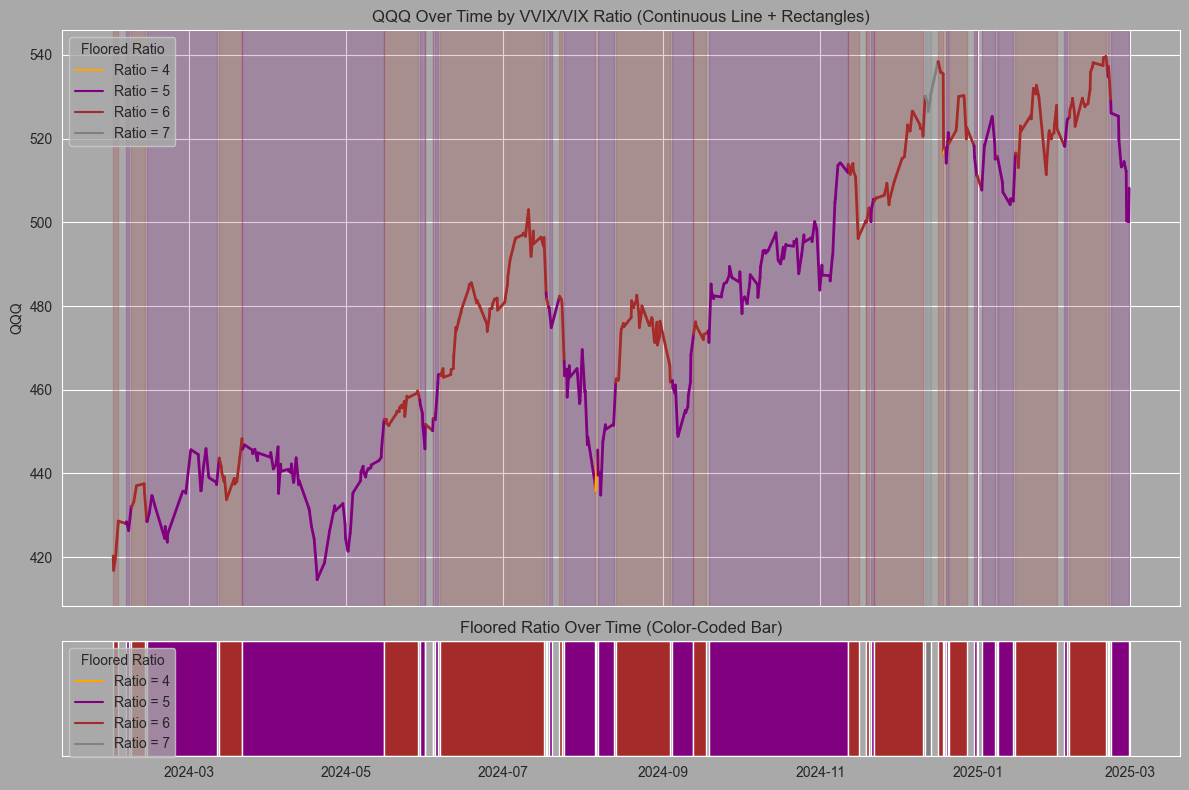

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Prepare Data ---
df = YMAG_VIX_VVIX_QQQ_4H.copy()  # Use your actual DataFrame name
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

# Compute the ratio and floor it
df['ratio'] = df['VVIX'] / df['VIX']
df['ratio_int'] = np.floor(df['ratio']).astype(int)

# Identify segments (change_id) where the floored ratio changes
df['change_id'] = (df['ratio_int'] != df['ratio_int'].shift(1)).cumsum()

# --- 2. Define a color map for each ratio ---
color_map = {
    1: 'green',
    2: 'red',
    3: 'blue',
    4: 'orange',
    5: 'purple',
    6: 'brown',
    7: 'gray',
    8: 'pink',
    9: 'olive',
    10: 'cyan'
}

# Get all unique ratios (sorted) for legend
unique_ratios = sorted(df['ratio_int'].unique())

# --- 3. Create a 2-subplot figure ---
fig, (ax_line, ax_bar) = plt.subplots(
    2, 1, sharex=True, figsize=(12, 8),
    gridspec_kw={'height_ratios': [2, 0.4]}
)

# Set dark gray background for figure and axes
fig.patch.set_facecolor('darkgray')
ax_line.set_facecolor('darkgray')
ax_bar.set_facecolor('darkgray')

# Optional: Seaborn style with a dark grid
sns.set_style("darkgrid", {'axes.facecolor': 'darkgray'})

# ==================================================================
#   TOP SUBPLOT: CONTINUOUS QQQ LINE + RECTANGLES
# ==================================================================
# A) Add "dummy" lines so each ratio appears once in the legend
for ratio_val in unique_ratios:
    ax_line.plot([], [], color=color_map.get(ratio_val, 'black'),
                 label=f'Ratio = {ratio_val}')

# B) Plot pairwise segments for a continuous line (based on QQQ)
for i in range(len(df) - 1):
    x1 = df.iloc[i]['Date']
    y1 = df.iloc[i]['QQQ']  # <-- Using QQQ now
    ratio1 = df.iloc[i]['ratio_int']
    x2 = df.iloc[i+1]['Date']
    y2 = df.iloc[i+1]['QQQ']  # <-- Using QQQ now
    
    color = color_map.get(ratio1, 'black')
    ax_line.plot([x1, x2], [y1, y2], color=color, linewidth=2)

# C) Add semi-transparent rectangles for each ratio segment
for _, grp in df.groupby('change_id'):
    ratio_val = grp['ratio_int'].iloc[0]
    color = color_map.get(ratio_val, 'black')
    start_date = grp['Date'].iloc[0]
    end_date = grp['Date'].iloc[-1]
    ax_line.axvspan(start_date, end_date, color=color, alpha=0.2)

ax_line.set_title('QQQ Over Time by VVIX/VIX Ratio (Continuous Line + Rectangles)')
ax_line.set_ylabel('QQQ')
ax_line.legend(title='Floored Ratio')

# ==================================================================
#   BOTTOM SUBPLOT: SINGLE BAR OF COLOR FOR EACH SEGMENT
# ==================================================================
# A) Add dummy lines for legend
for ratio_val in unique_ratios:
    ax_bar.plot([], [], color=color_map.get(ratio_val, 'black'),
                label=f'Ratio = {ratio_val}')

# B) For each segment, fill the bottom subplot with a solid rectangle
for _, grp in df.groupby('change_id'):
    ratio_val = grp['ratio_int'].iloc[0]
    color = color_map.get(ratio_val, 'black')
    start_date = grp['Date'].iloc[0]
    end_date = grp['Date'].iloc[-1]
    ax_bar.axvspan(start_date, end_date, facecolor=color, alpha=1.0)

ax_bar.set_ylim(0, 1)
ax_bar.set_yticks([])
ax_bar.set_ylabel('')
ax_bar.set_title('Floored Ratio Over Time (Color-Coded Bar)')
ax_bar.legend(title='Floored Ratio', loc='upper left')

plt.tight_layout()
plt.show() 


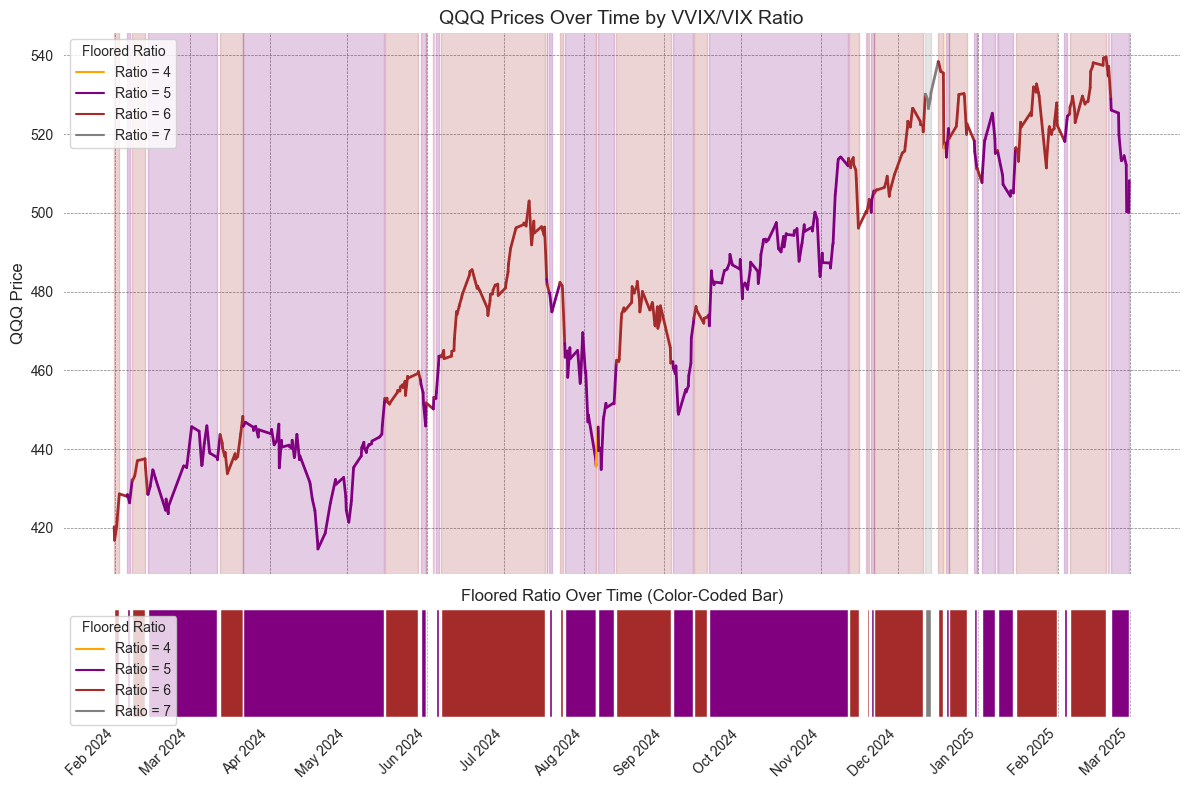

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# --- 1. Prepare Data ---
df = YMAG_VIX_VVIX_QQQ_4H.copy()  # Use your actual DataFrame name
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

# Compute the ratio and floor it
df['ratio'] = df['VVIX'] / df['VIX']
df['ratio_int'] = np.floor(df['ratio']).astype(int)

# Identify segments (change_id) where the floored ratio changes
df['change_id'] = (df['ratio_int'] != df['ratio_int'].shift(1)).cumsum()

# --- 2. Define a color map for each ratio ---
color_map = {
    1: 'green',
    2: 'red',
    3: 'blue',
    4: 'orange',
    5: 'purple',
    6: 'brown',
    7: 'gray',
    8: 'pink',
    9: 'olive',
    10: 'cyan'
}

# Get all unique ratios (sorted) for the legend
unique_ratios = sorted(df['ratio_int'].unique())

# --- 3. Create a 2-subplot figure with white background ---
fig, (ax_line, ax_bar) = plt.subplots(
    2, 1, sharex=True, figsize=(12, 8),
    gridspec_kw={'height_ratios': [2, 0.4]}
)

# Set white background for figure and axes
fig.patch.set_facecolor('white')
ax_line.set_facecolor('white')
ax_bar.set_facecolor('white')

# Use Seaborn whitegrid style (this adds grid lines by default)
sns.set_style("whitegrid")

# ==================================================================
#   TOP SUBPLOT: CONTINUOUS QQQ LINE + RECTANGLES
# ==================================================================
# A) Add "dummy" lines so each ratio appears once in the legend
for ratio_val in unique_ratios:
    ax_line.plot([], [], color=color_map.get(ratio_val, 'black'),
                 label=f'Ratio = {ratio_val}')

# B) Plot pairwise segments for a continuous QQQ line
for i in range(len(df) - 1):
    x1 = df.iloc[i]['Date']
    y1 = df.iloc[i]['QQQ']
    ratio1 = df.iloc[i]['ratio_int']
    x2 = df.iloc[i+1]['Date']
    y2 = df.iloc[i+1]['QQQ']
    
    color = color_map.get(ratio1, 'black')
    ax_line.plot([x1, x2], [y1, y2], color=color, linewidth=2)

# C) Add semi-transparent rectangles for each ratio segment
for _, grp in df.groupby('change_id'):
    ratio_val = grp['ratio_int'].iloc[0]
    color = color_map.get(ratio_val, 'black')
    start_date = grp['Date'].iloc[0]
    end_date = grp['Date'].iloc[-1]
    ax_line.axvspan(start_date, end_date, color=color, alpha=0.2)

ax_line.set_title('QQQ Prices Over Time by VVIX/VIX Ratio', fontsize=14)
ax_line.set_ylabel('QQQ Price', fontsize=12)
ax_line.legend(title='Floored Ratio')

# ==================================================================
#   BOTTOM SUBPLOT: COLOR-CODED BAR INDICATOR FOR EACH SEGMENT
# ==================================================================
# A) Add dummy lines for legend (optional)
for ratio_val in unique_ratios:
    ax_bar.plot([], [], color=color_map.get(ratio_val, 'black'),
                label=f'Ratio = {ratio_val}')

# B) For each segment, fill the bottom subplot with a solid rectangle
for _, grp in df.groupby('change_id'):
    ratio_val = grp['ratio_int'].iloc[0]
    color = color_map.get(ratio_val, 'black')
    start_date = grp['Date'].iloc[0]
    end_date = grp['Date'].iloc[-1]
    ax_bar.axvspan(start_date, end_date, facecolor=color, alpha=1.0)

ax_bar.set_ylim(0, 1)
ax_bar.set_yticks([])
ax_bar.set_ylabel('')
ax_bar.set_title('Floored Ratio Over Time (Color-Coded Bar)')
ax_bar.legend(title='Floored Ratio', loc='upper left')

# ==================================================================
#   SET X-AXIS TICKS AND GRIDS TO ONE TICK PER MONTH
# ==================================================================
month_locator = mdates.MonthLocator()  # tick every month
month_formatter = mdates.DateFormatter('%b %Y')  # format ticks as "Jan 2020"
ax_line.xaxis.set_major_locator(month_locator)
ax_line.xaxis.set_major_formatter(month_formatter)
ax_bar.xaxis.set_major_locator(month_locator)
ax_bar.xaxis.set_major_formatter(month_formatter)

# Rotate tick labels for readability
plt.setp(ax_line.xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.setp(ax_bar.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Explicitly add grid lines (if needed, though whitegrid should do it)
ax_line.grid(True, which='major', linestyle='--', linewidth=0.5, color='grey')
ax_bar.grid(True, which='major', linestyle='--', linewidth=0.5, color='grey')

plt.tight_layout()
plt.show()


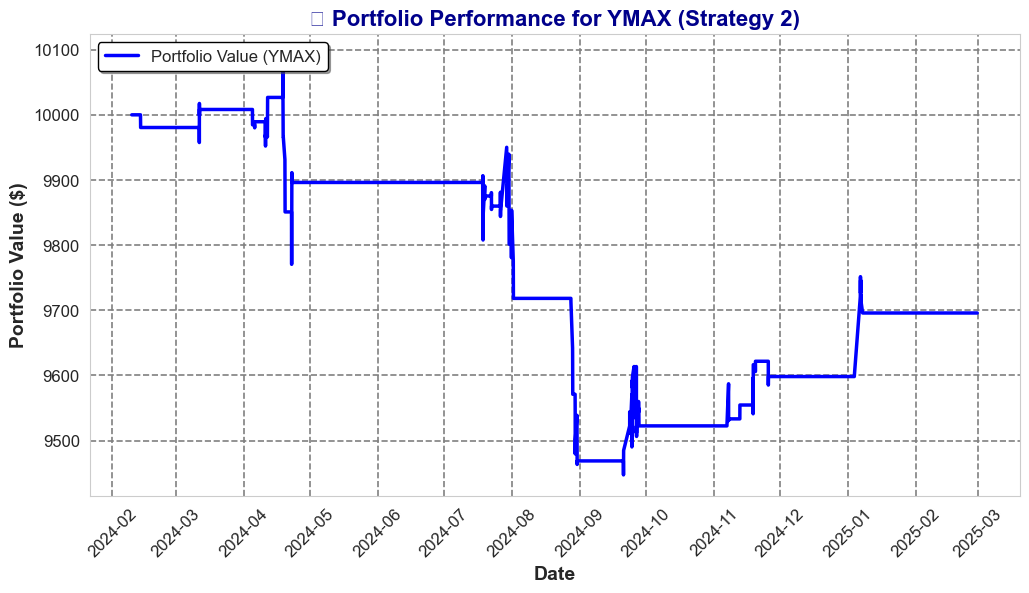

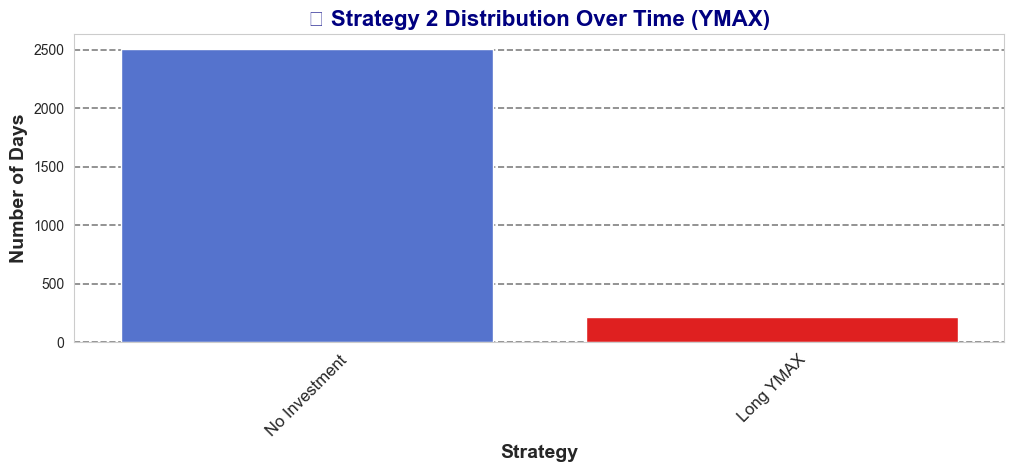

In [54]:
# ------------------------------------------------------------
# 1) PREPARE THE DATA
# ------------------------------------------------------------
# DataFrame "Prices_and_stats_df" with Columns: ["Date", "YMAX", "YMAX Dividends", "VIX", "VVIX", ...]
# We copy it for this strategy's backtest on YMAX.
ymax_df = YMAX_VIX_VVIX_QQQ_30M.copy()

# Define initial portfolio value
initial_investment = 10000.0  # $10,000 starting capital

# Sort by date to ensure chronological order
ymax_df.sort_values("Date", inplace=True)
ymax_df.reset_index(drop=True, inplace=True)

# ------------------------------------------------------------
# 2) DEFINE HELPER FUNCTIONS FOR CONDITIONS
# ------------------------------------------------------------
# function to check if it is time to enter the market or not
def in_market_condition(vix, vvix):
    """ 
    Condition for staying in the market once we're already invested:
    15 <= VIX <= 20, 90 <= VVIX < 100
    """
    return (15 <= vix <= 20) and (90 <= vvix < 100)

#function to check if it is time to re-enter the market or not
def reentry_condition(vix, vvix):
    """
    Stricter condition for re-entering the market after an exit:
    15 <= VIX <= 20, 90 <= VVIX <= 95
    """
    return (15 <= vix <= 20) and (90 <= vvix <= 95)

# function to check the exit condition if it is time to exit the market or not to exit
def exit_condition(vix, vvix):
    """
    If VIX < 15 or VIX > 20, or VVIX < 90 or VVIX >= 100 -> EXIT
    """
    return (vix < 15) or (vix > 20) or (vvix < 90) or (vvix >= 100)

# ------------------------------------------------------------
# 3) SET UP BACKTEST COLUMNS AND INITIAL VALUES
# ------------------------------------------------------------
ymax_df["Portfolio_Value"] = np.nan
ymax_df.loc[0, "Portfolio_Value"] = initial_investment

# Boolean: are we currently invested?
ymax_df["In_Market"] = False
ymax_df.loc[0, "In_Market"] = False

# Track how many shares of YMAX we hold
ymax_df["Shares_Held"] = 0.0
ymax_df.loc[0, "Shares_Held"] = 0.0

# Strategy label for each day
ymax_df["Strategy"] = "No Investment"

# ------------------------------------------------------------
# 4) BACKTEST LOOP
# ------------------------------------------------------------
for i in range(1, len(ymax_df)):
    # Copy forward previous day's portfolio value, in_market status, and shares
    ymax_df.loc[i, "Portfolio_Value"] = ymax_df.loc[i-1, "Portfolio_Value"]
    ymax_df.loc[i, "In_Market"] = ymax_df.loc[i-1, "In_Market"]
    ymax_df.loc[i, "Shares_Held"] = ymax_df.loc[i-1, "Shares_Held"]

    # Current day data
    vix_today = ymax_df.loc[i, "VIX"]
    vvix_today = ymax_df.loc[i, "VVIX"]
    ymax_price_today = ymax_df.loc[i, "YMAX"]
    ymax_div_today = ymax_df.loc[i, "YMAX Dividends"]

    # Are we in the market at the start of today?
    currently_in_market = ymax_df.loc[i-1, "In_Market"]

    if currently_in_market:
        # Check if we remain in the market or exit
        if exit_condition(vix_today, vvix_today):
            # EXIT: close position -> shares = 0, remain in cash
            ymax_df.loc[i, "In_Market"] = False
            ymax_df.loc[i, "Shares_Held"] = 0.0
            ymax_df.loc[i, "Strategy"] = "No Investment"
            # Portfolio_Value stays the same as yesterday's (carried forward)
        else:
            # REMAIN IN MARKET: update portfolio value based on today's price + dividend
            shares_held = ymax_df.loc[i, "Shares_Held"]
            new_portfolio_value = shares_held * (ymax_price_today + ymax_div_today)
            ymax_df.loc[i, "Portfolio_Value"] = new_portfolio_value
            ymax_df.loc[i, "Strategy"] = "Long YMAX"
    else:
        # currently out of market, check re-entry condition
        if reentry_condition(vix_today, vvix_today):
            # ENTER: buy shares with all capital
            cash_available = ymax_df.loc[i, "Portfolio_Value"]
            if ymax_price_today > 0:
                shares_bought = cash_available / ymax_price_today
                ymax_df.loc[i, "Shares_Held"] = shares_bought
                ymax_df.loc[i, "In_Market"] = True
                ymax_df.loc[i, "Strategy"] = "Long YMAX"
                # Immediately compute today's new portfolio value
                new_portfolio_value = shares_bought * (ymax_price_today + ymax_div_today)
                ymax_df.loc[i, "Portfolio_Value"] = new_portfolio_value
            else:
                # If price is 0 or invalid, skip
                ymax_df.loc[i, "Strategy"] = "No Investment"
        else:
            # Stay in cash
            ymax_df.loc[i, "Strategy"] = "No Investment"

# ------------------------------------------------------------
# 5) COMPUTE DAILY RETURNS
# ------------------------------------------------------------
ymax_df["Portfolio_Return"] = ymax_df["Portfolio_Value"].pct_change()

# ------------------------------------------------------------
# 6) VISUALIZE RESULTS
# ------------------------------------------------------------
sns.set_style("whitegrid")

# (A) Portfolio Performance Plot
plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    x=ymax_df["Date"],
    y=ymax_df["Portfolio_Value"],
    color="blue",
    linewidth=2.5,
    label="Portfolio Value (YMAX)"
)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.xlabel("Date", fontsize=14, fontweight="bold")
plt.ylabel("Portfolio Value ($)", fontsize=14, fontweight="bold")
plt.title("📈 Portfolio Performance for YMAX (Strategy 2)", fontsize=16, fontweight="bold", color="darkblue")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle="--", linewidth=1.2, color="gray")
plt.legend(fontsize=12, loc="upper left", frameon=True, shadow=True, edgecolor="black")
plt.show()

# (B) Strategy Usage Over Time
plt.figure(figsize=(12, 4))
ax = sns.barplot(
    x=ymax_df["Strategy"].value_counts().index,
    y=ymax_df["Strategy"].value_counts().values,
    palette=["royalblue", "red", "green"]
)
plt.xlabel("Strategy", fontsize=14, fontweight="bold")
plt.ylabel("Number of Days", fontsize=14, fontweight="bold")
plt.title("📊 Strategy 2 Distribution Over Time (YMAX)", fontsize=16, fontweight="bold", color="navy")
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis="y", linestyle="--", linewidth=1.2, color="gray")
plt.show()


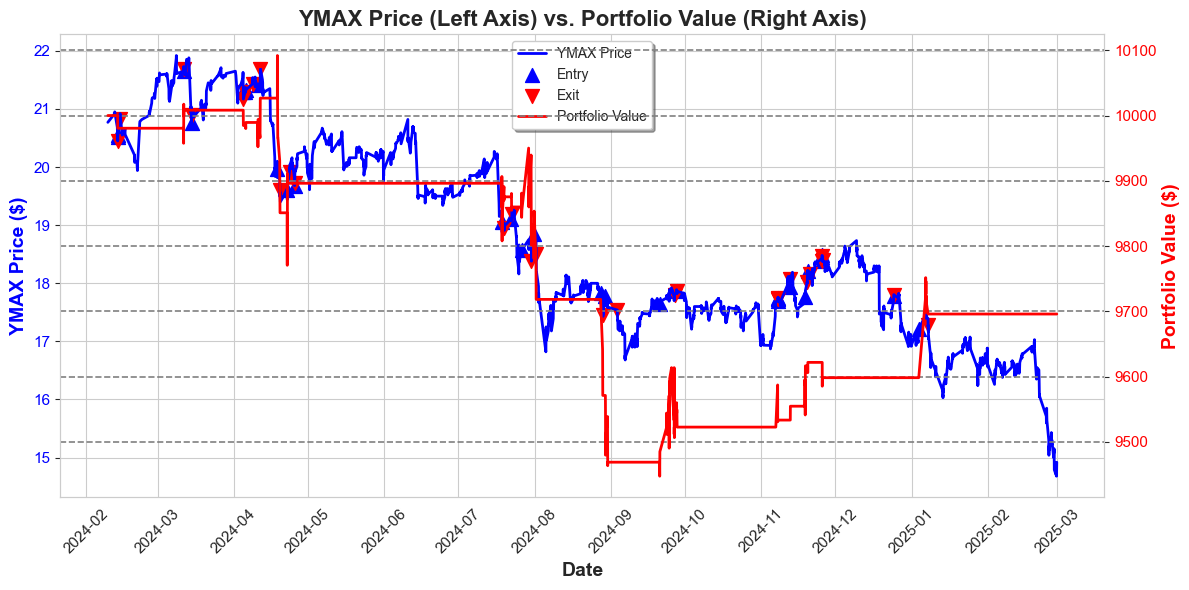

In [55]:
# ---------------------------------------------
# STEP A: Identify Entry and Exit Days
# ---------------------------------------------
# Entry Day = Yesterday was out of market, today is in market
ymax_df["Entry"] = (ymax_df["In_Market"].shift(1) == False) & (ymax_df["In_Market"] == True)

# Exit Day = Yesterday was in market, today is out of market
ymax_df["Exit"] = (ymax_df["In_Market"].shift(1) == True) & (ymax_df["In_Market"] == False)

# ---------------------------------------------
# STEP B: Prepare Data for Plotting
# ---------------------------------------------
entry_days = ymax_df[ymax_df["Entry"] == True]
exit_days  = ymax_df[ymax_df["Exit"] == True]

# Sort data by date (just to be safe)
ymax_df.sort_values("Date", inplace=True)
ymax_df.reset_index(drop=True, inplace=True)

# ---------------------------------------------
# STEP C: Create the Dual-Axis Plot
# ---------------------------------------------
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(12, 6))

# LEFT Y-AXIS: Plot YMAX Price
ax1.set_xlabel("Date", fontsize=14, fontweight="bold")
ax1.set_ylabel("YMAX Price ($)", fontsize=14, fontweight="bold", color="blue")

# Plot YMAX Price line
line1, = ax1.plot(ymax_df["Date"], ymax_df["YMAX"], color="blue", linewidth=2, label="YMAX Price")

# Add entry (^) and exit (v) markers on YMAX
ax1.scatter(entry_days["Date"], entry_days["YMAX"], marker="^", color="blue", s=100, label="Entry")
ax1.scatter(exit_days["Date"], exit_days["YMAX"], marker="v", color="red", s=100, label="Exit")

# Make the left y-axis text blue for clarity
ax1.tick_params(axis='y', labelcolor="blue")

# Format the date axis
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)

# ---------------------------------------------
# RIGHT Y-AXIS: Plot Portfolio Value
# ---------------------------------------------
ax2 = ax1.twinx()  # share the same x-axis
ax2.set_ylabel("Portfolio Value ($)", fontsize=14, fontweight="bold", color="red")

line2, = ax2.plot(
    ymax_df["Date"],
    ymax_df["Portfolio_Value"],
    color="red",
    linewidth=2,
    label="Portfolio Value"
)
ax2.tick_params(axis='y', labelcolor="red")
plt.yticks(fontsize=11)

# ---------------------------------------------
# STEP D: Enhance the Plot
# ---------------------------------------------
plt.title("YMAX Price (Left Axis) vs. Portfolio Value (Right Axis)", fontsize=16, fontweight="bold")
plt.grid(True, linestyle="--", linewidth=1.2, color="gray")

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper center", frameon=True, shadow=True)

plt.tight_layout()
plt.show()


In [56]:
import plotly.graph_objects as go

# ---------------------------------------------
# STEP A: Identify Entry and Exit Days
# ---------------------------------------------
ymax_df["Entry"] = (ymax_df["In_Market"].shift(1) == False) & (ymax_df["In_Market"] == True)
ymax_df["Exit"]  = (ymax_df["In_Market"].shift(1) == True) & (ymax_df["In_Market"] == False)

# ---------------------------------------------
# STEP B: Prepare Data for Plotting
# ---------------------------------------------
entry_days = ymax_df[ymax_df["Entry"] == True]
exit_days  = ymax_df[ymax_df["Exit"] == True]

# Sort data by date
ymax_df.sort_values("Date", inplace=True)
ymax_df.reset_index(drop=True, inplace=True)

# ---------------------------------------------
# STEP C: Create Plotly Figure
# ---------------------------------------------
fig = go.Figure()

# 1) YMAX Price (Left Axis)
fig.add_trace(
    go.Scatter(
        x=ymax_df["Date"],
        y=ymax_df["YMAX"],
        mode="lines",
        line=dict(color="blue", width=2),
        name="YMAX Price",
        yaxis="y1"
    )
)

# 2) Entry Markers (triangle-up)
fig.add_trace(
    go.Scatter(
        x=entry_days["Date"],
        y=entry_days["YMAX"],
        mode="markers",
        marker=dict(symbol="triangle-up", color="blue", size=12),
        name="Entry",
        yaxis="y1"
    )
)

# 3) Exit Markers (triangle-down)
fig.add_trace(
    go.Scatter(
        x=exit_days["Date"],
        y=exit_days["YMAX"],
        mode="markers",
        marker=dict(symbol="triangle-down", color="red", size=12),
        name="Exit",
        yaxis="y1"
    )
)

# 4) Portfolio Value (Right Axis)
fig.add_trace(
    go.Scatter(
        x=ymax_df["Date"],
        y=ymax_df["Portfolio_Value"],
        mode="lines",
        line=dict(color="red", width=2),
        name="Portfolio Value",
        yaxis="y2"
    )
)

# ---------------------------------------------
# STEP D: Configure Layout for Dual Axis
# ---------------------------------------------
fig.update_layout(
    title="YMAX Price (Left Axis) vs. Portfolio Value (Right Axis) - Interactive Plotly",
    xaxis=dict(
        title="Date",
        type="date",
        tickformat="%Y-%m",
        tickangle=45
    ),
    yaxis=dict(
        title="YMAX Price ($)",
        side="left",
        showgrid=False,
        color="blue"
    ),
    yaxis2=dict(
        title="Portfolio Value ($)",
        side="right",
        overlaying="y",
        position=1.0,
        showgrid=True,
        gridwidth=1,
        gridcolor="lightgray",
        color="red"
    ),
    legend=dict(
        x=1.0,
        y=1.0,
        xanchor='center',
        yanchor='top',
        bgcolor="rgba(255,255,255,0.7)",
        bordercolor="black",
        borderwidth=1
    ),
    hovermode="x unified"
)

# ---------------------------------------------
# STEP E: Show Interactive Figure
# ---------------------------------------------
fig.show()


In [57]:
# ---------------------------------------------
# STEP 1: Compute Performance Metrics for Strategy 2 on YMAX
# ---------------------------------------------
# Compute daily returns from portfolio value (if not already computed)
ymax_df["Portfolio_Return"] = ymax_df["Portfolio_Value"].pct_change()

performance_metrics = {}

# Total Return (%)
performance_metrics["Total Return (%)"] = (ymax_df["Portfolio_Value"].iloc[-1] / ymax_df["Portfolio_Value"].iloc[0] - 1) * 100

# CAGR (Compounded Annual Growth Rate) (%)
num_days = (ymax_df["Date"].iloc[-1] - ymax_df["Date"].iloc[0]).days
years = num_days / 365
performance_metrics["CAGR (%)"] = ((ymax_df["Portfolio_Value"].iloc[-1] / ymax_df["Portfolio_Value"].iloc[0]) ** (1 / years) - 1) * 100

# Annualized Volatility (%)
performance_metrics["Annualized Volatility (%)"] = ymax_df["Portfolio_Return"].std() * np.sqrt(252) * 100

# Sharpe Ratio (assuming risk-free rate = 2%)
risk_free_rate = 0.02
sharpe_ratio = (performance_metrics["CAGR (%)"] / 100 - risk_free_rate) / (performance_metrics["Annualized Volatility (%)"] / 100)
performance_metrics["Sharpe Ratio"] = sharpe_ratio

# Max Drawdown (%) Calculation
rolling_max = ymax_df["Portfolio_Value"].cummax()
drawdown = (ymax_df["Portfolio_Value"] / rolling_max) - 1  # Decimal values (e.g., -0.10 for -10%)
drawdown_percentage = drawdown * 100  # Convert to percentage
performance_metrics["Max Drawdown (%)"] = drawdown_percentage.min()  # Most negative value

# Calmar Ratio (CAGR / |Max Drawdown|)
max_drawdown_abs = abs(performance_metrics["Max Drawdown (%)"])
performance_metrics["Calmar Ratio"] = performance_metrics["CAGR (%)"] / max_drawdown_abs if max_drawdown_abs != 0 else np.nan

# Convert metrics to a DataFrame for display
performance_df = pd.DataFrame(performance_metrics, index=["YMAX Strategy 2"])

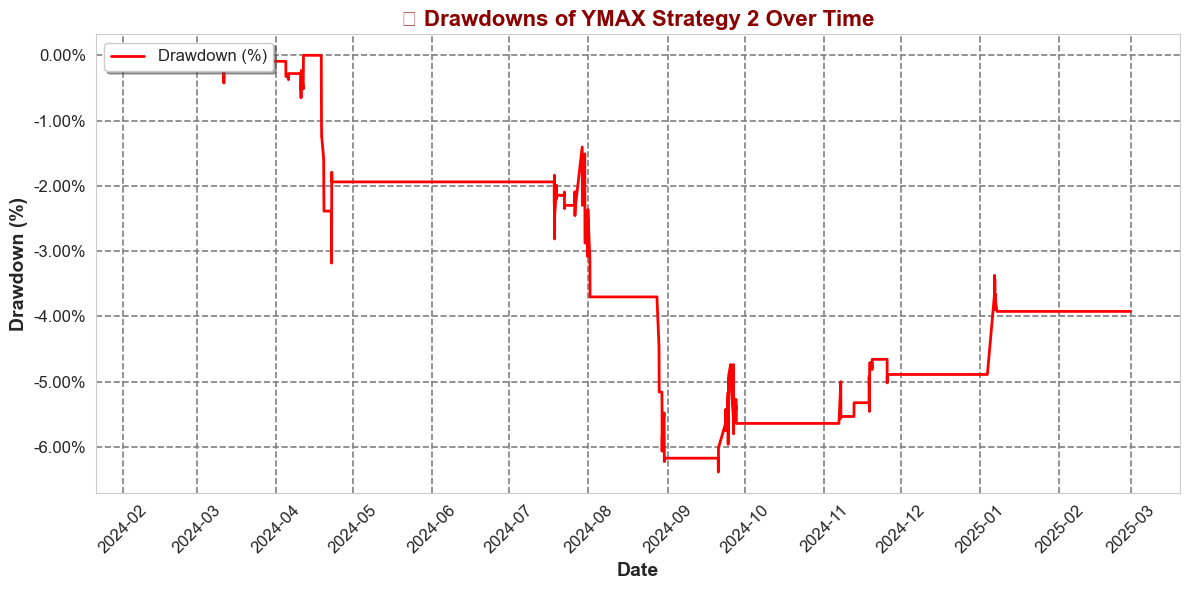

In [58]:
# ---------------------------------------------
# STEP 2: Plot Drawdown Over Time
# ---------------------------------------------
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

ax = sns.lineplot(
    x=ymax_df["Date"],
    y=drawdown_percentage,
    color="red",
    linewidth=2,
    label="Drawdown (%)"
)

# Format X-axis to display months
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Format Y-axis labels as percentages (e.g., -1.00%, -2.00%)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, pos: f"{y:.2f}%"))

plt.xlabel("Date", fontsize=14, fontweight="bold")
plt.ylabel("Drawdown (%)", fontsize=14, fontweight="bold")
plt.title("📉 Drawdowns of YMAX Strategy 2 Over Time", fontsize=16, fontweight="bold", color="darkred")

# Add thick, colored grid lines
plt.grid(True, linestyle="--", linewidth=1.2, color="gray")

plt.legend(fontsize=12, loc="upper left", frameon=True, shadow=True)
plt.tight_layout()
plt.show()
